# Phishing Capstone Project

***

## Relevant libraries and style sheets

In [1]:
# libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from collections import defaultdict
from IPython.core.display import HTML
import numpy as np
import seaborn as sns
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score



In [2]:
# Files courtesy of Brandon Rhodes: https://github.com/brandon-rhodes/pycon-pandas-tutorial
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

***

## 1. Data Wrangling

In [3]:
# data
data = pd.read_csv('datasets/phishing_data.csv')

In [4]:
# deleting existing index column, and reindexing starting at 0 for consistency
data['index'] = data.index
data.index.name = 'index'
data.drop("index", axis=1, inplace=True)
data.shape

(11055, 31)

In [5]:
pd.set_option('display.max_columns', None) 
data.head(3)

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,-1,1,1,1,-1,-1,-1,-1,-1,1,1,-1,1,-1,1,-1,-1,-1,0,1,1,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,1,-1,1,0,-1,-1,1,1,0,1,1,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,1,-1,1,0,-1,-1,-1,-1,0,1,1,1,1,1,-1,1,-1,1,0,-1,-1


#### 1a. Renaming Columns

In [6]:
new_cols = ['url_contains_ip_address', 'url_length', 'shortening_service',
       'url_contains_at_symbol', 'url_contains_double_slash', 'url_contains_dash',
       'url_contains_sub_domain', 'ssl_final_state', 'domain_registeration_period',
       'external_url_favicon', 'standard_ports', 'url_contains_https_token', 'request_url', 'url_of_anchor',
       'links_in_tags', 'sfh', 'submitting_to_email', 'abnormal_url',
       'redirect', 'status_bar_change', 'right_click_disabled', 'popup_window', 'uses_iframe',
       'age_of_domain', 'dns_record_available', 'web_traffic', 'page_rank',
       'google_index_exists', 'links_pointing_to_page', 'statistical_report',
       'result']
data.columns = new_cols

In [7]:
data.head(3)

,url_contains_ip_address,url_length,shortening_service,url_contains_at_symbol,url_contains_double_slash,url_contains_dash,url_contains_sub_domain,ssl_final_state,domain_registeration_period,external_url_favicon,standard_ports,url_contains_https_token,request_url,url_of_anchor,links_in_tags,sfh,submitting_to_email,abnormal_url,redirect,status_bar_change,right_click_disabled,popup_window,uses_iframe,age_of_domain,dns_record_available,web_traffic,page_rank,google_index_exists,links_pointing_to_page,statistical_report,result
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,-1,1,1,1,-1,-1,-1,-1,-1,1,1,-1,1,-1,1,-1,-1,-1,0,1,1,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,1,-1,1,0,-1,-1,1,1,0,1,1,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,1,-1,1,0,-1,-1,-1,-1,0,1,1,1,1,1,-1,1,-1,1,0,-1,-1


#### 1b. Data Dictionary

In [8]:
for col in data.columns:
    if col != 'result':
        print(data.groupby([col, 'result']).size().unstack('result'))

result                     -1     1
url_contains_ip_address            
-1                       1926  1867
 1                       2972  4290
result        -1     1
url_length            
-1          4079  4881
 0            83    52
 1           736  1224
result                -1     1
shortening_service            
-1                   514   930
 1                  4384  5227
result                    -1     1
url_contains_at_symbol            
-1                       837   818
 1                      4061  5339
result                       -1     1
url_contains_double_slash            
-1                          562   867
 1                         4336  5290
result                 -1       1
url_contains_dash                
-1                 4898.0  4692.0
 1                    NaN  1465.0
result                     -1     1
url_contains_sub_domain            
-1                       1836  1527
 0                       2252  1370
 1                        810  3260
result   

In [9]:
# nested data dict.
data_dict = defaultdict(lambda: defaultdict(str))
data_dict['url_contains_ip_address'][-1] = 'T'
data_dict['url_contains_ip_address'][1] = 'F'

data_dict['url_length'][-1] = '< 54 chars'
data_dict['url_length'][0] = '54 to 75'
data_dict['url_length'][1] = '> 75 chars'

data_dict['shortening_service'][-1] = 'T'
data_dict['shortening_service'][1] = 'F'

data_dict['url_contains_at_symbol'][-1] = 'T'
data_dict['url_contains_at_symbol'][1] = 'F'

data_dict['url_contains_double_slash'][-1] = 'T'
data_dict['url_contains_double_slash'][1] = 'F'

data_dict['url_contains_dash'][-1] = 'T'
data_dict['url_contains_dash'][1] = 'F'

data_dict['url_contains_sub_domain'][-1] = '1 dot in domain part'
data_dict['url_contains_sub_domain'][0] = '2 dots in domain part'
data_dict['url_contains_sub_domain'][1] = 'more than 2 dots in domain part'

data_dict['ssl_final_state'][-1] = 'does not use https; issuer is not trusted' 
data_dict['ssl_final_state'][0] = 'uses https; issuer is not trusted'
data_dict['ssl_final_state'][1] = 'uses https; issuer is trusted; age of certificate > 1 year'

data_dict['domain_registeration_period'][-1] = 'domain expires in <= 1 year'
data_dict['domain_registeration_period'][1] = 'domain expires in >= 1 year'

data_dict['external_url_favicon'][-1] = 'T'
data_dict['external_url_favicon'][1] = 'F'

data_dict['standard_ports'][-1] = 'T'
data_dict['standard_ports'][1] = 'F'

data_dict['url_contains_https_token'][-1] = 'T'
data_dict['url_contains_https_token'][1] = 'F'

data_dict['request_url'][-1] = '< 22%'
data_dict['request_url'][1] = '> 22%'

data_dict['url_of_anchor'][-1] = '< 31%'
data_dict['url_of_anchor'][0] = '31 to 67'
data_dict['url_of_anchor'][1] = '> 67%'

data_dict['links_in_tags'][-1] = '< 17%'
data_dict['links_in_tags'][0] = '17 to 81'
data_dict['links_in_tags'][1] = '> 81%'

data_dict['sfh'][-1] = 'sfh refers to same domain'
data_dict['sfh'][0] = 'sfh refers to a different domain'
data_dict['sfh'][1] = 'sfh is "about: blank" or empty'

data_dict['submitting_to_email'][-1] = 'T'
data_dict['submitting_to_email'][1] = 'F'

data_dict['abnormal_url'][-1] = 'host name not in url'
data_dict['abnormal_url'][1] = 'host name in url'

data_dict['url_contains_host_name'][-1] = 'F'
data_dict['url_contains_host_name'][1] = 'T'

data_dict['redirect'][0] = '<4'
data_dict['redirect'][1] = '>=4'

data_dict['status_bar_change'][-1] = 'T'
data_dict['status_bar_change'][1] = 'F'

data_dict['right_click_disabled'][-1] = 'T'
data_dict['right_click_disabled'][1] = 'F'

data_dict['popup_window'][-1] = 'T'
data_dict['popup_window'][1] = 'F'

data_dict['uses_iframe'][-1] = 'T'
data_dict['uses_iframe'][1] = 'F'

data_dict['age_of_domain'][-1] = '< 6 months'
data_dict['age_of_domain'][1] = '> 6 months'

data_dict['dns_record_available'][-1] = 'F'
data_dict['dns_record_available'][1] = 'T'

data_dict['web_traffic'][-1] = 'web rank by traffic > 100,000'
data_dict['web_traffic'][0] = 'web rank by traffic not available' 
data_dict['web_traffic'][1] = 'web rank by traffic < 100,000'

data_dict['page_rank'][-1] = 'page rank >= 0.2'
data_dict['page_rank'][1] = 'page rank < 0.2'

data_dict['google_index_exists'][-1] = 'F'
data_dict['google_index_exists'][1] = 'T'

data_dict['links_pointing_to_page'][-1] = '0'
data_dict['links_pointing_to_page'][0] = '0 to 2'
data_dict['links_pointing_to_page'][1] = '>2'

data_dict['statistical_report'][-1] = 'host belongs to top phishing domains, survey by PhishTank'
data_dict['statistical_report'][1] = 'host does not belong to top phishing domains, survey by PhishTank'

In [10]:
acceptable_ports = pd.read_csv('datasets/acceptable_ports.csv')
acceptable_ports

,PORT,Service,Meaning,Preferred Status
0,21,FTP,Transfer files from one host to another,Close
1,22,SSH,Secure File Transfer Protocol,Close
2,23,Telnet,provide a bidirectional interactive text-orien...,Close
3,80,HTTP,Hyper test transfer protocol,Open
4,443,HTTPS,Hypertext transfer protocol secured,Open
5,445,SMB,"Providing shared access to files, printers, se...",Close
6,1433,MSSQL,Store and retrieve data as requested by other ...,Close
7,1521,ORACLE,Access oracle database from web.,Close
8,3306,MySQL,Access MySQL database from web.,Close
9,3389,Remote Desktop,allow remote access and remote collaboration,Close


#### 1c. Missing Values & Outliers

In [11]:
[sum(data[i].isnull()) for i in data.columns]

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [12]:
[set(data[i]) for i in data.columns]

[{-1, 1},
 {-1, 0, 1},
 {-1, 1},
 {-1, 1},
 {-1, 1},
 {-1, 1},
 {-1, 0, 1},
 {-1, 0, 1},
 {-1, 1},
 {-1, 1},
 {-1, 1},
 {-1, 1},
 {-1, 1},
 {-1, 0, 1},
 {-1, 0, 1},
 {-1, 0, 1},
 {-1, 1},
 {-1, 1},
 {0, 1},
 {-1, 1},
 {-1, 1},
 {-1, 1},
 {-1, 1},
 {-1, 1},
 {-1, 1},
 {-1, 0, 1},
 {-1, 1},
 {-1, 1},
 {-1, 0, 1},
 {-1, 1},
 {-1, 1}]

***

## 2. Exploratory Data Analysis

C:\Users\maksym\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


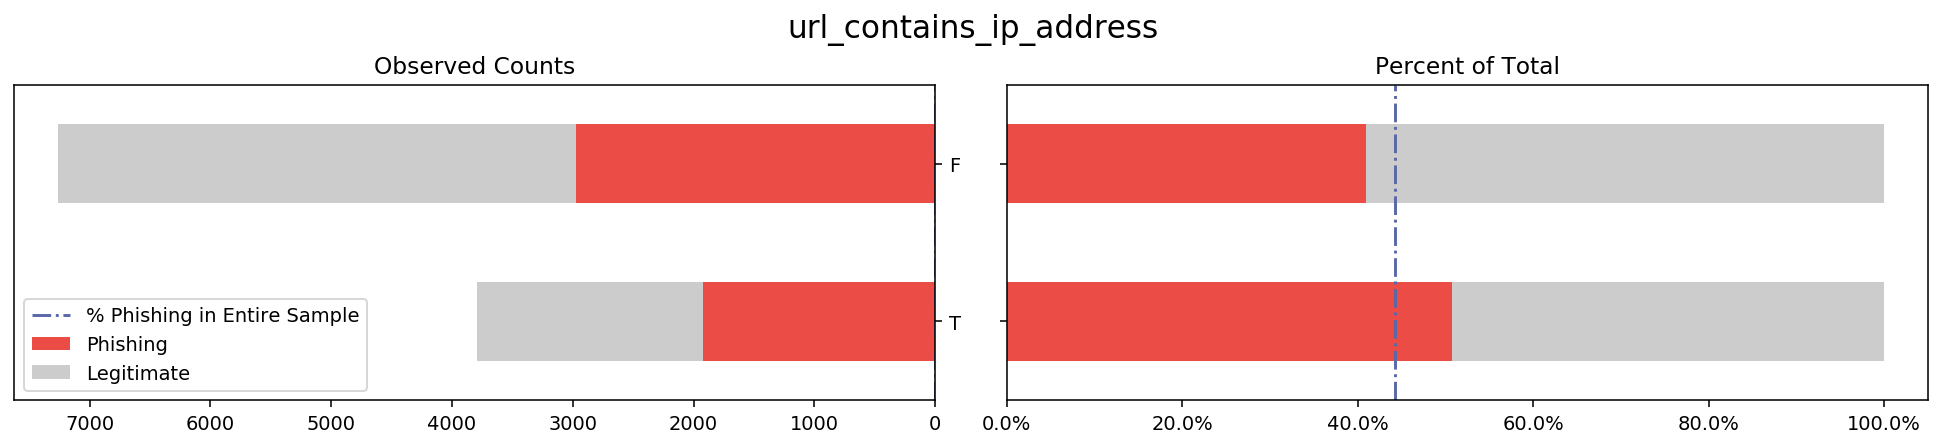

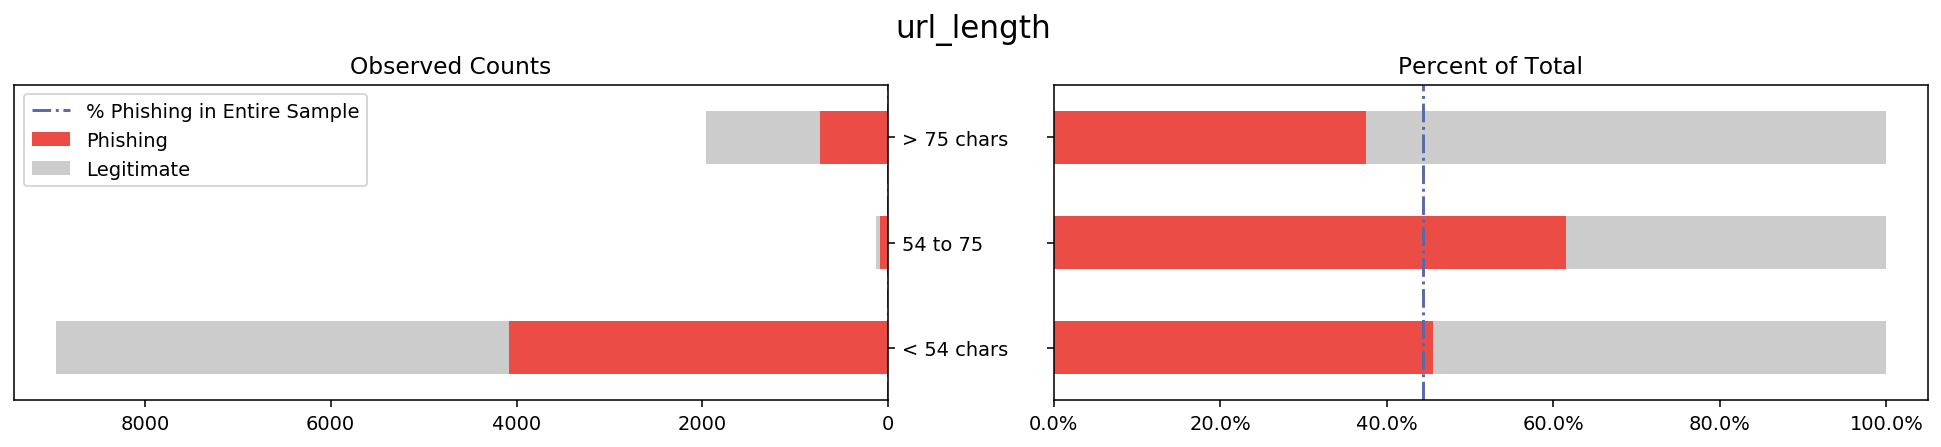

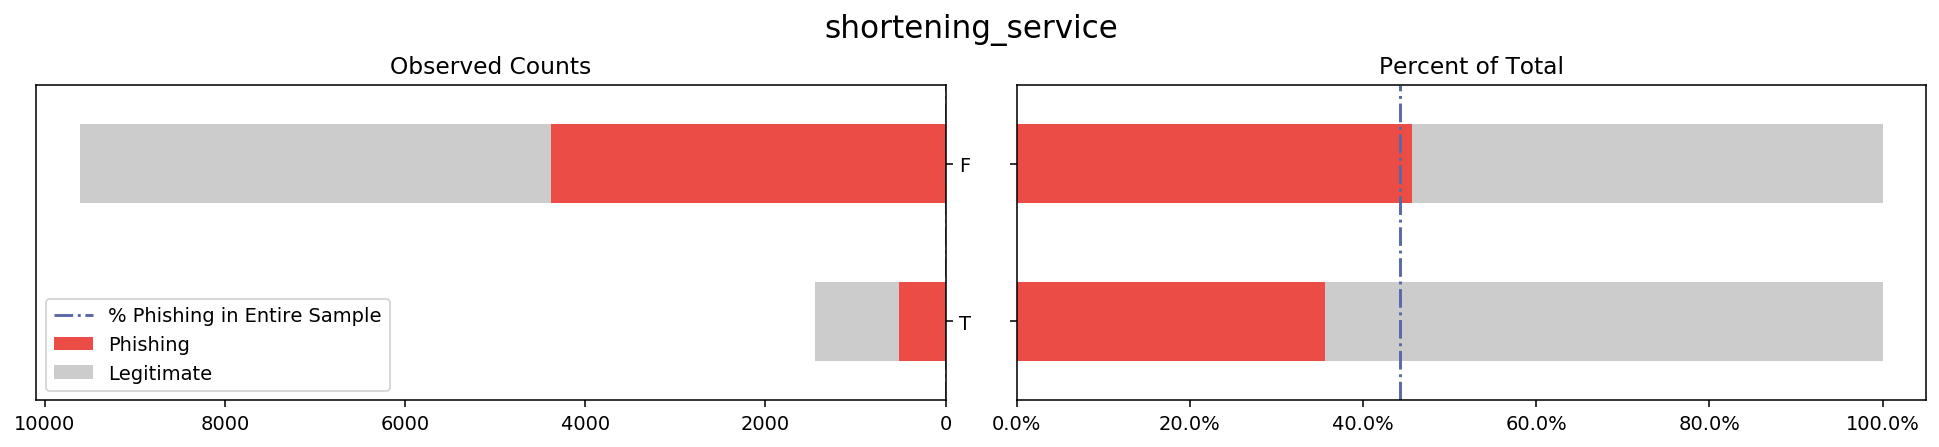

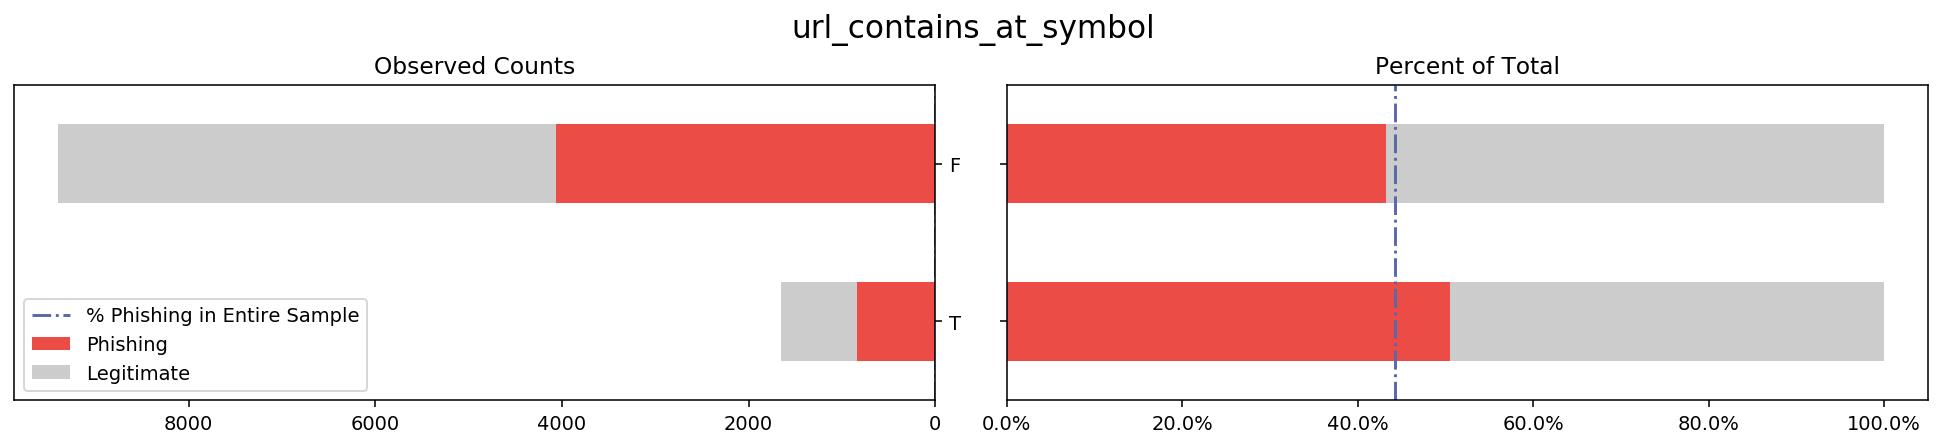

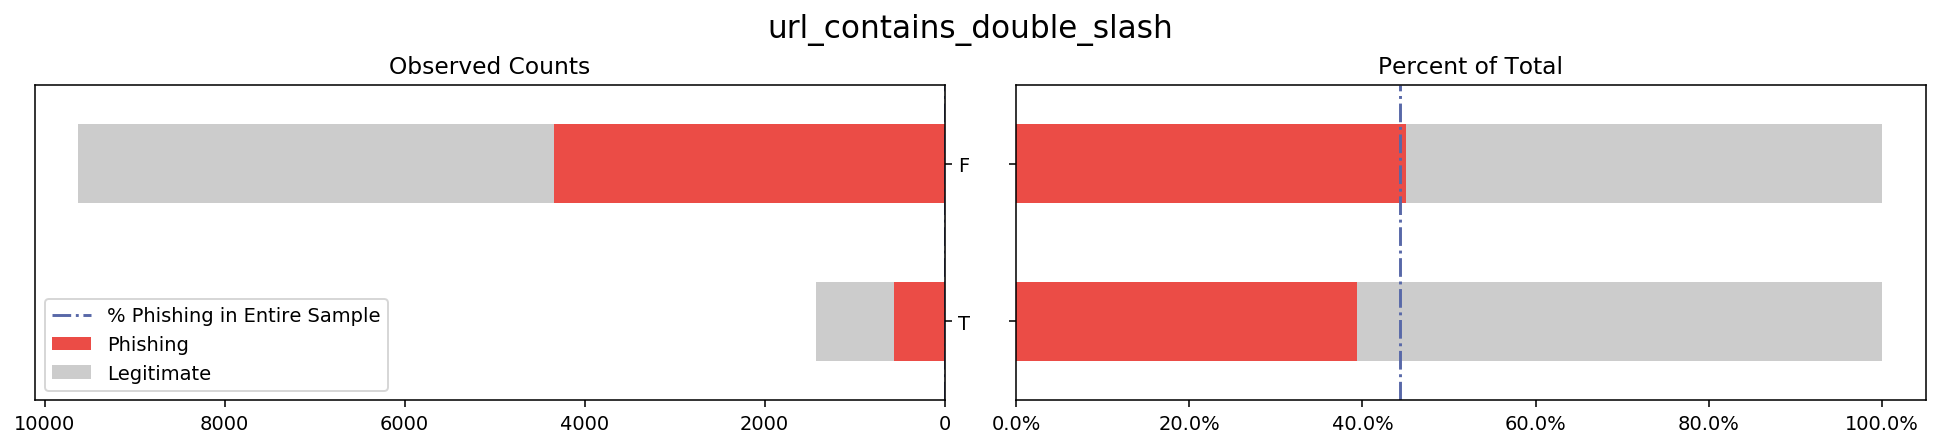

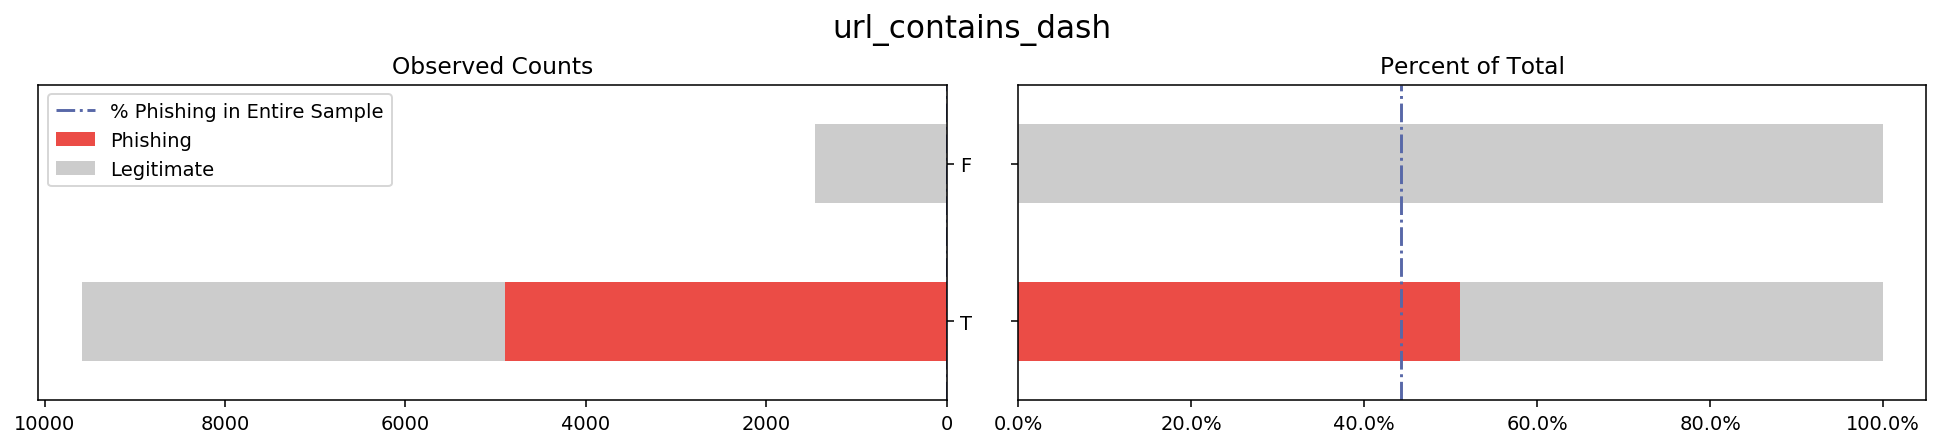

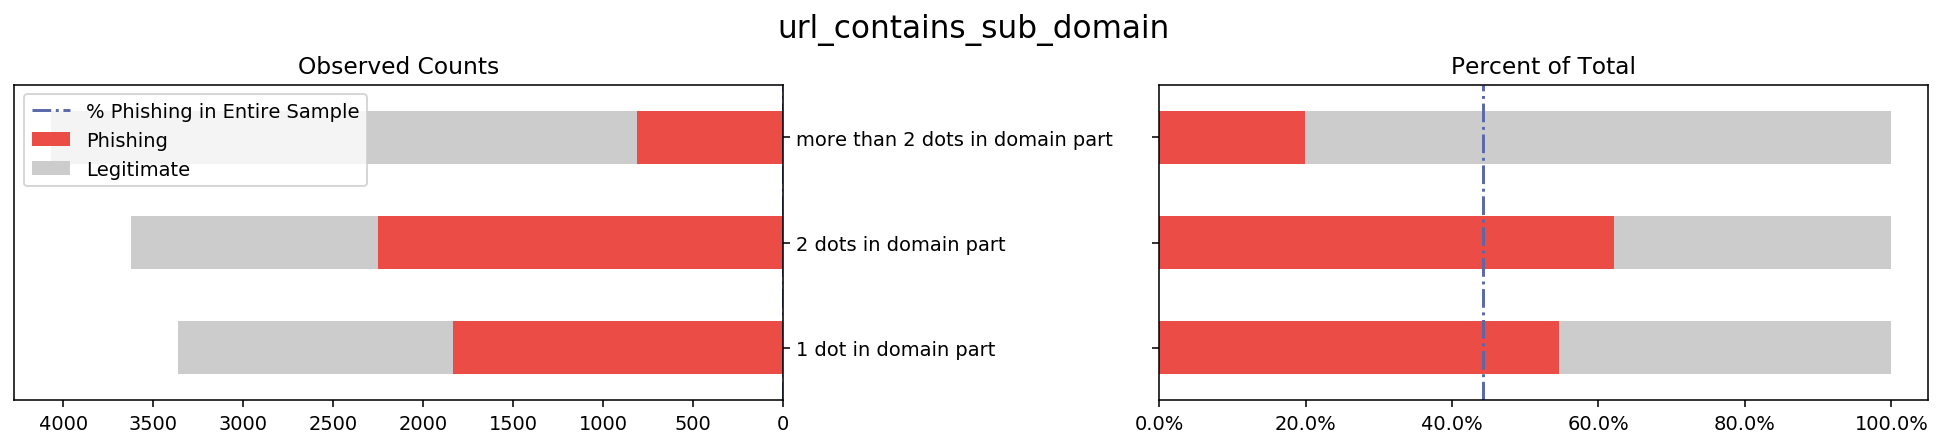

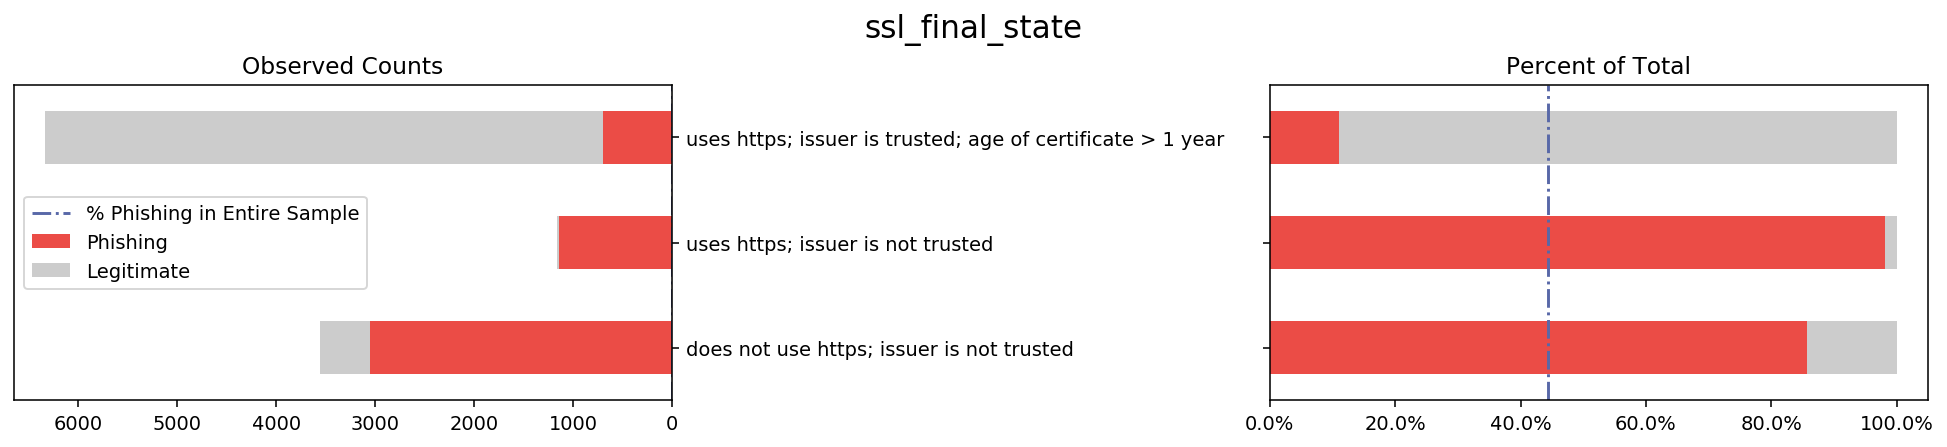

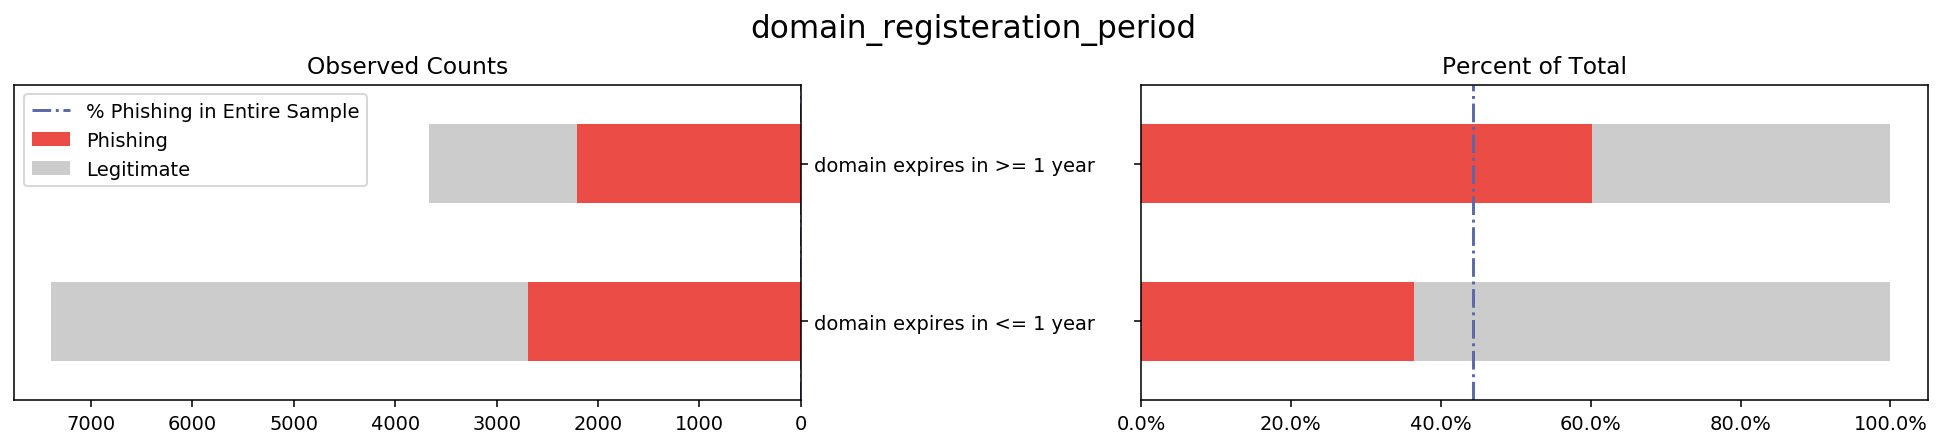

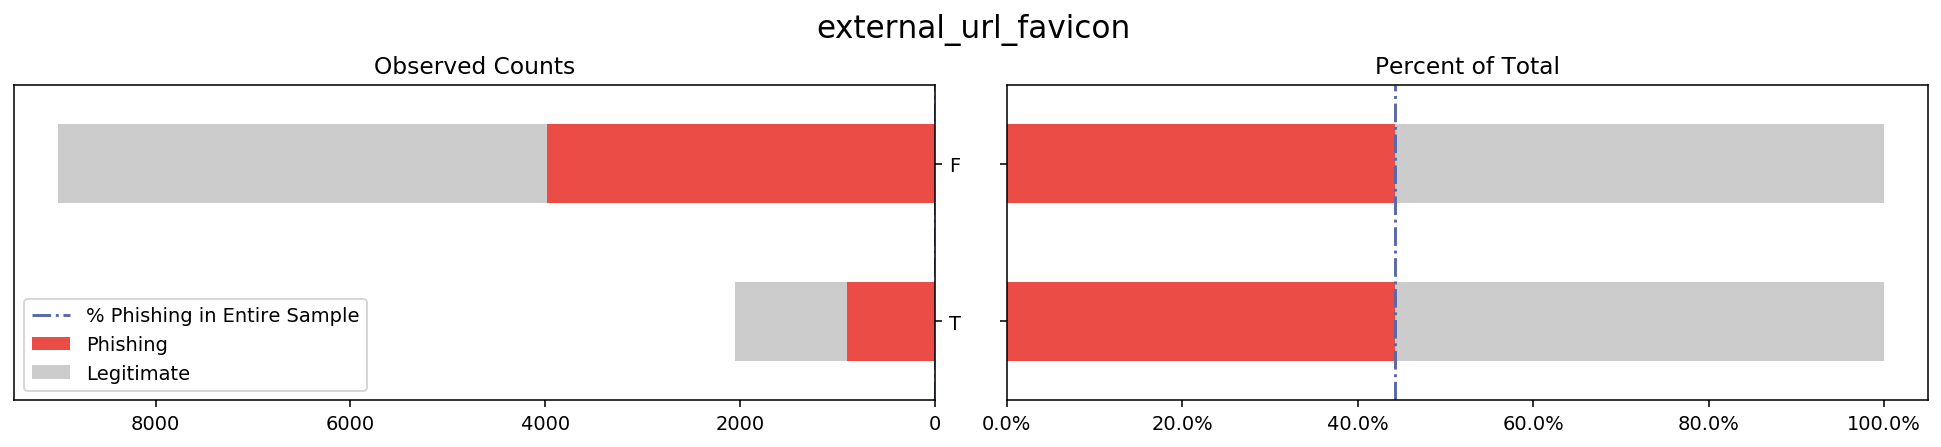

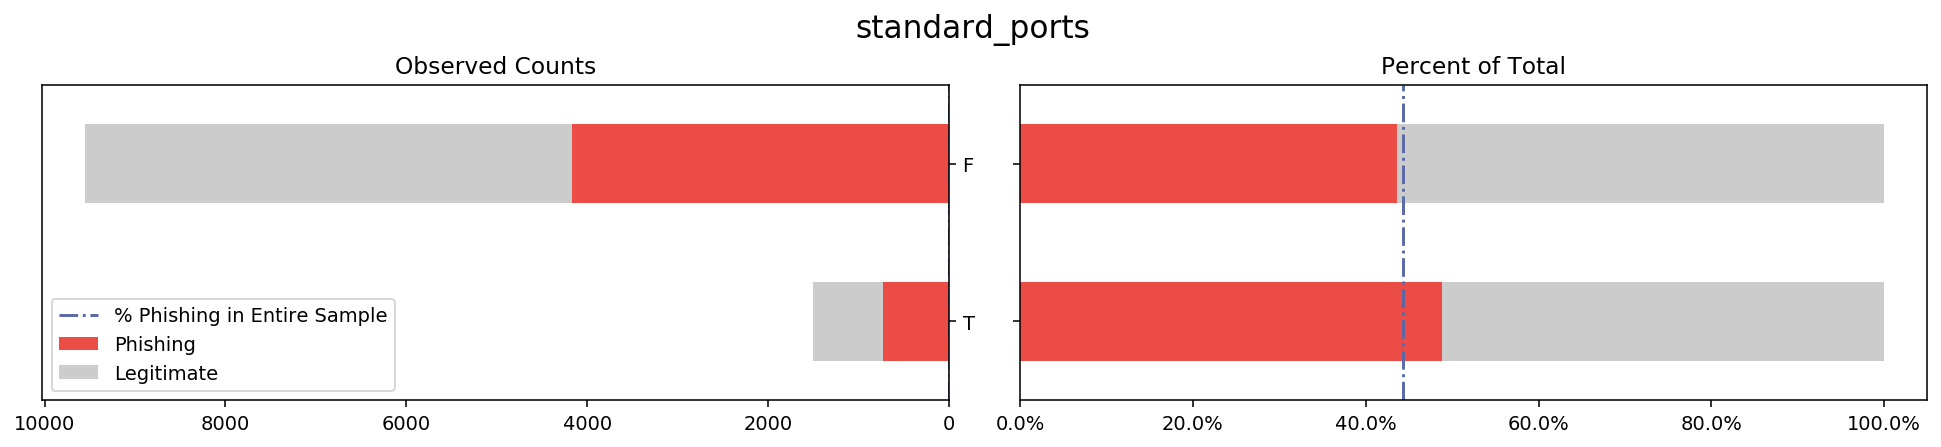

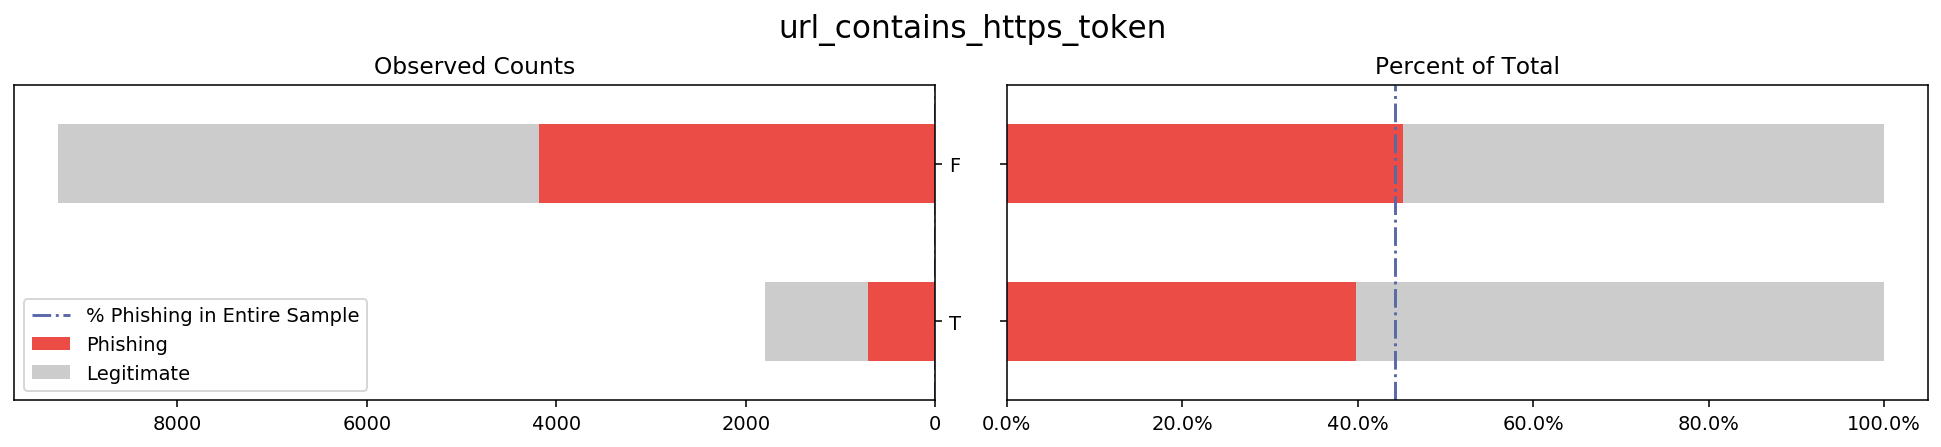

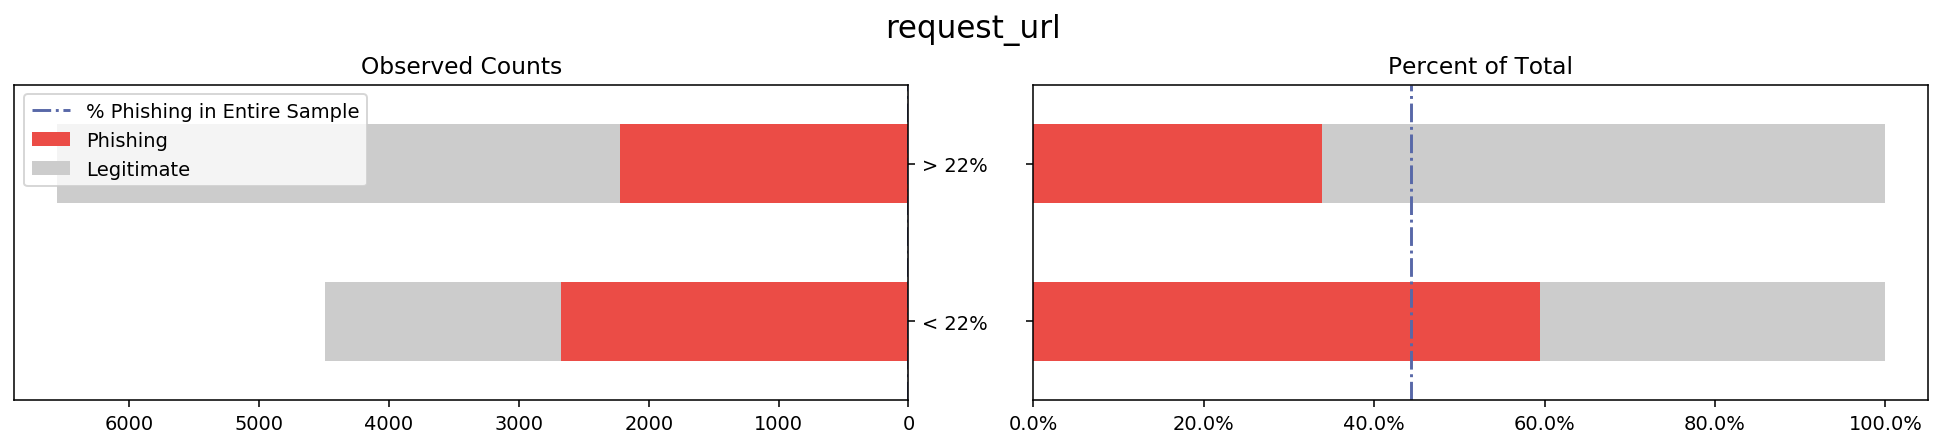

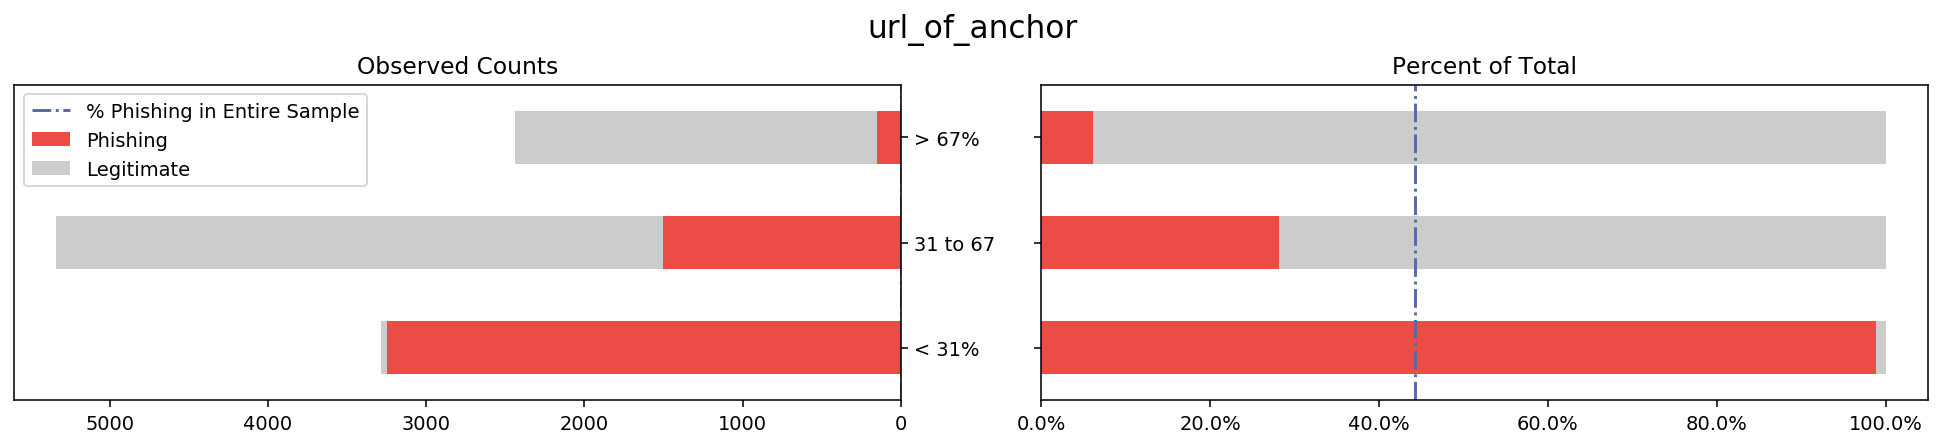

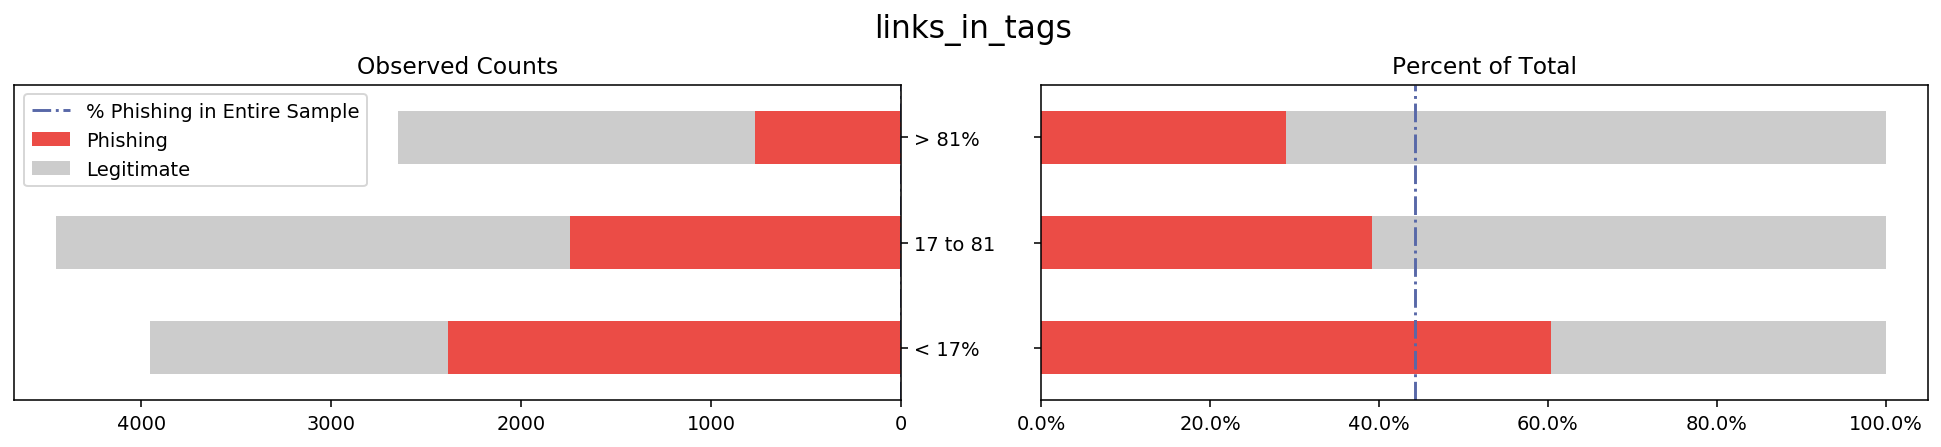

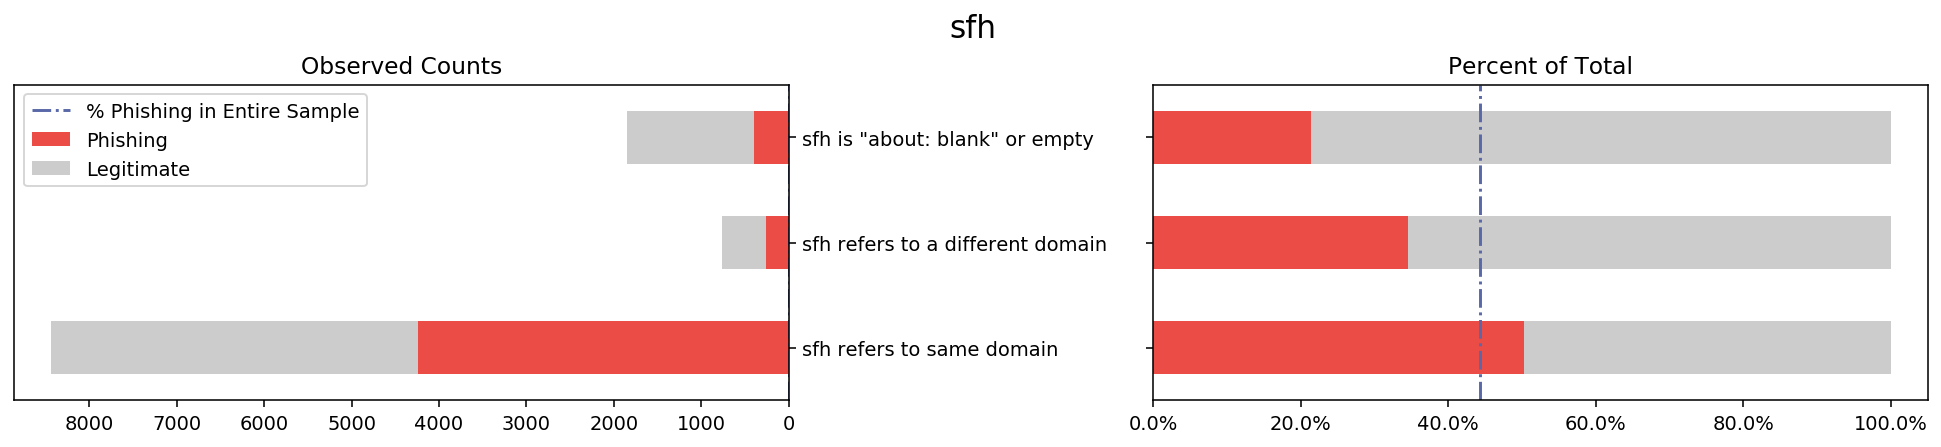

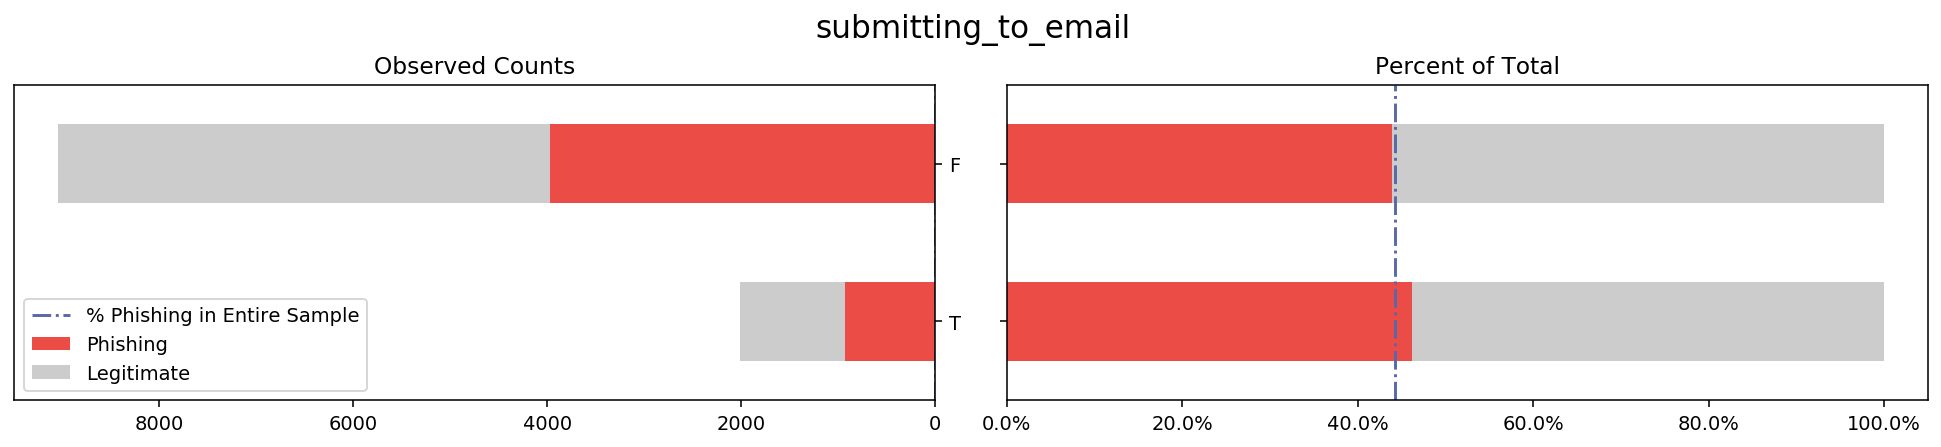

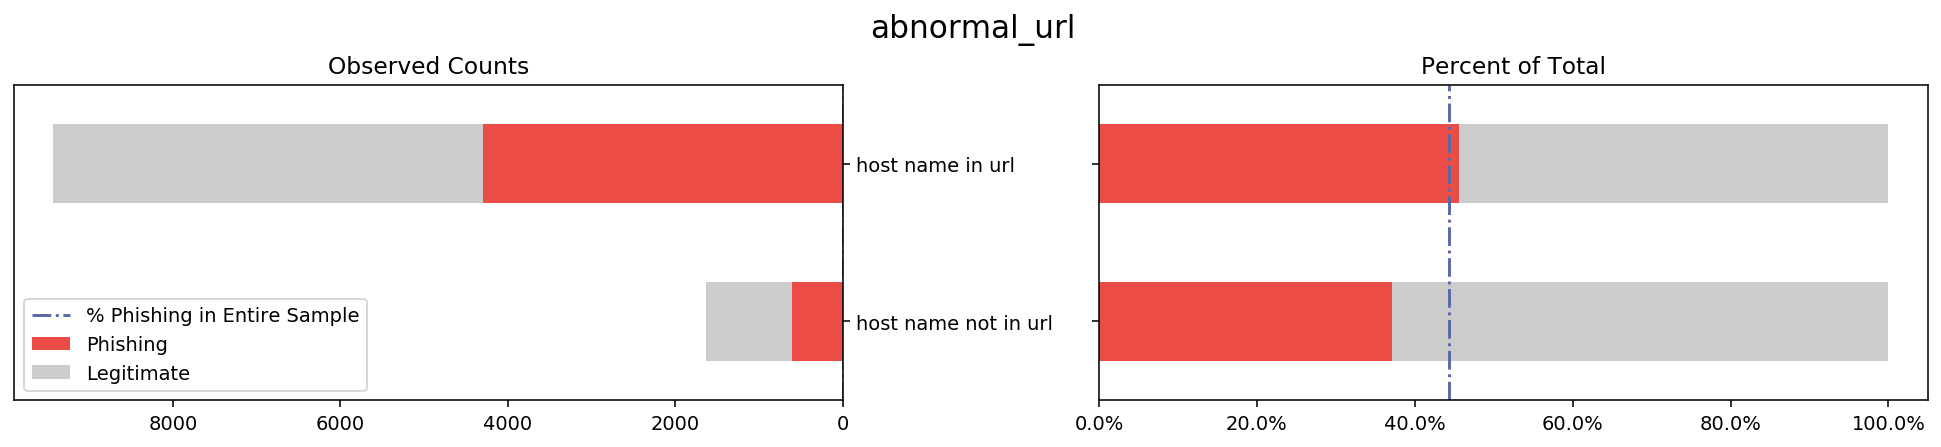

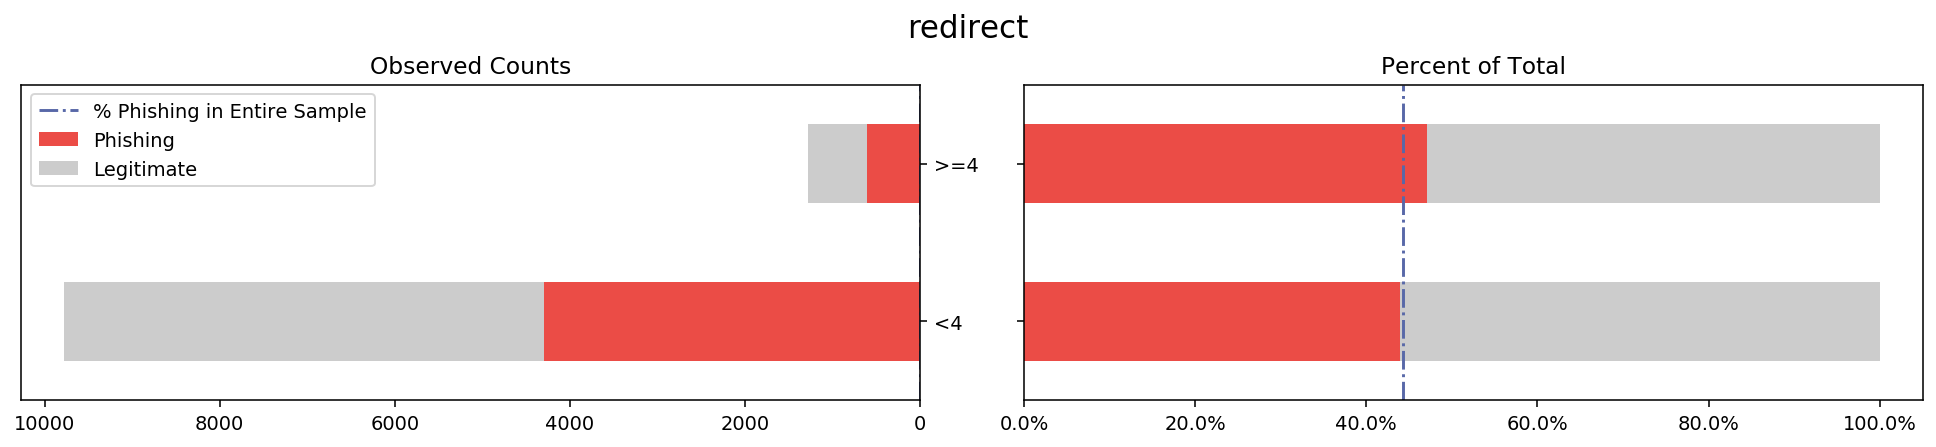

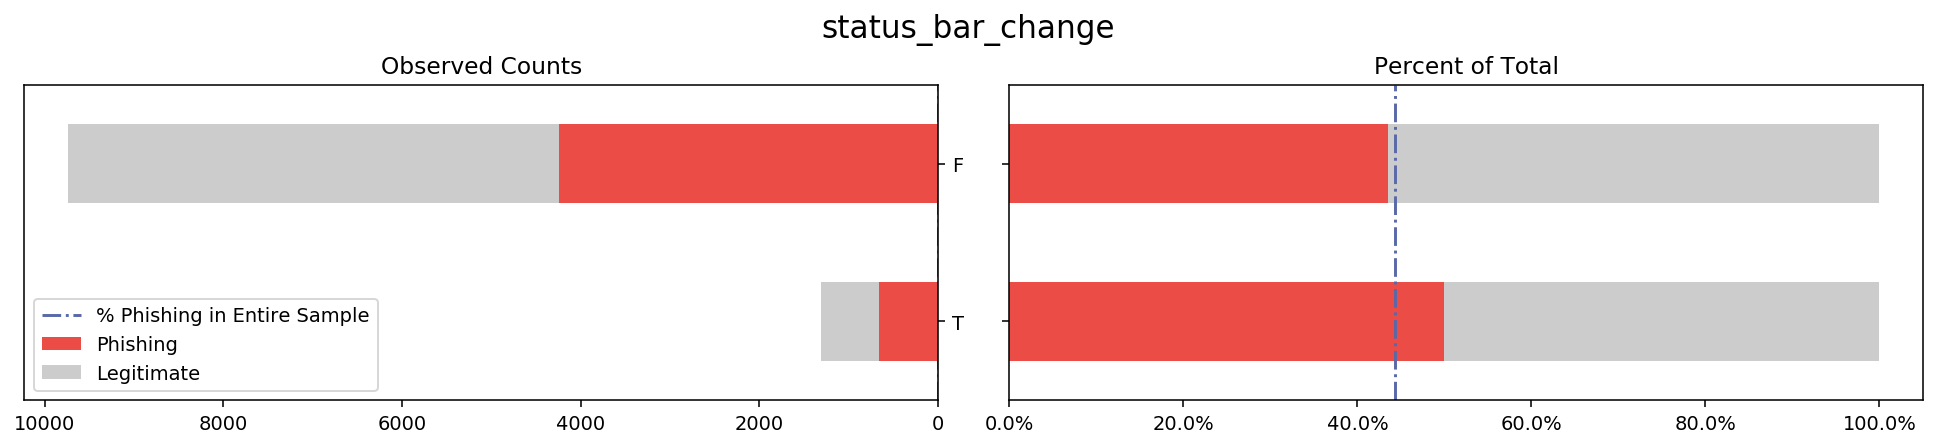

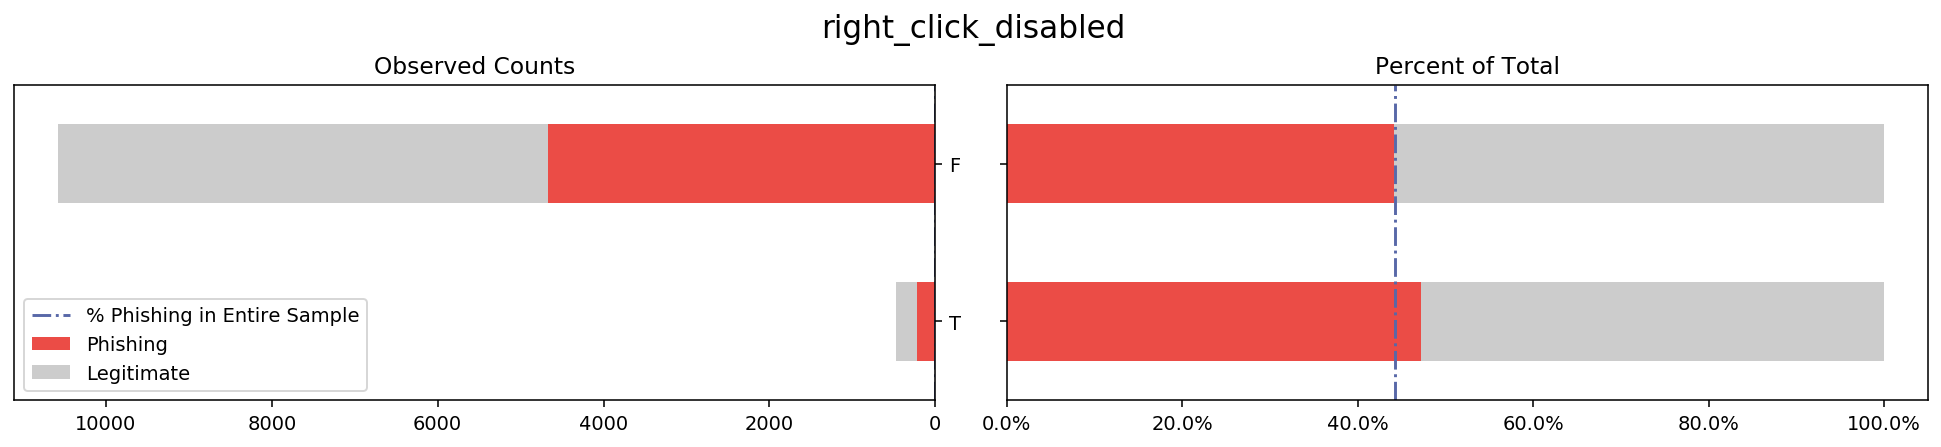

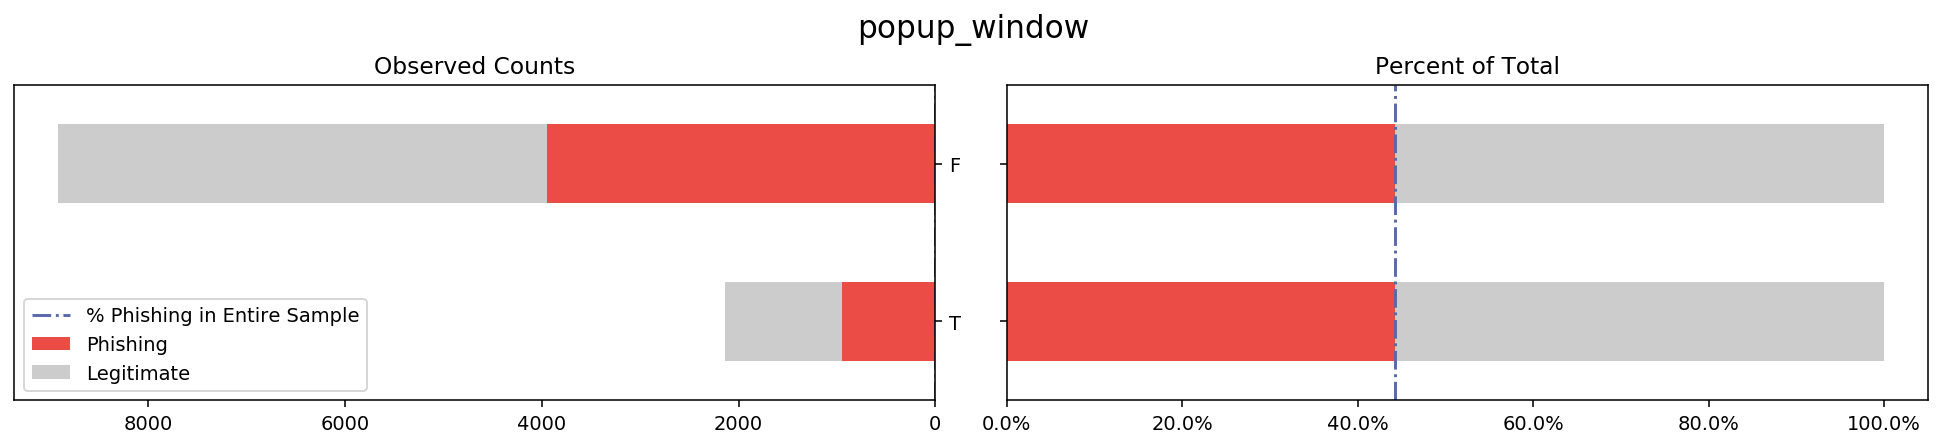

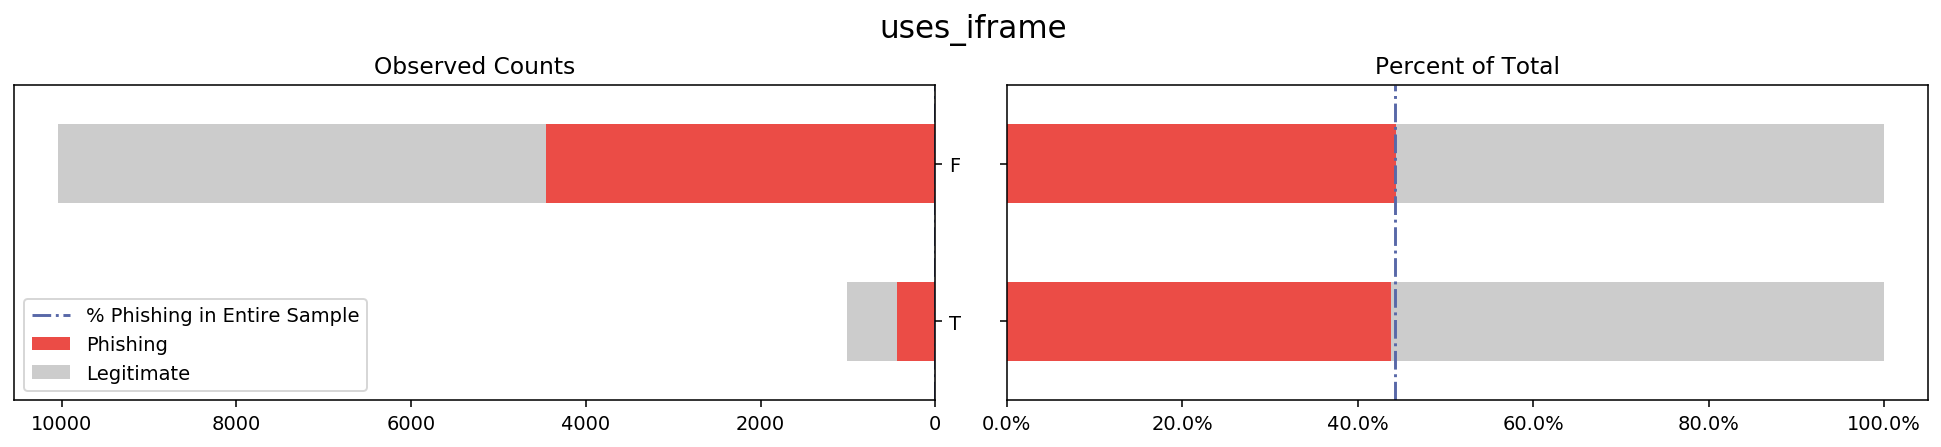

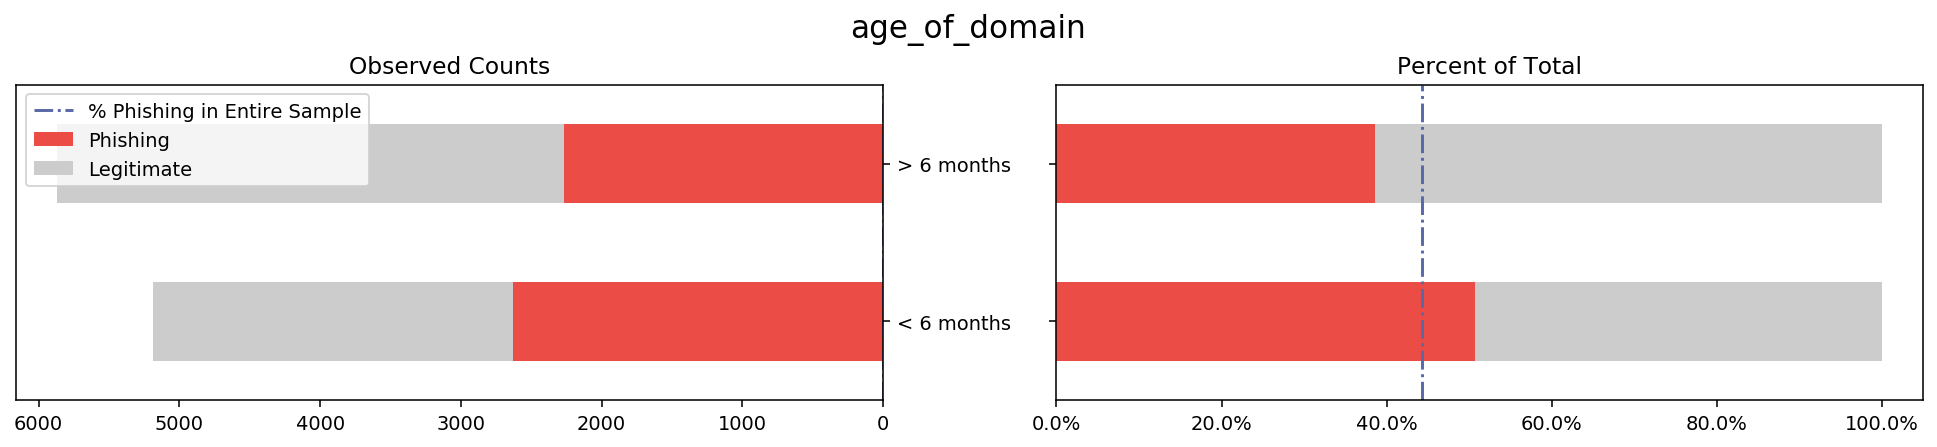

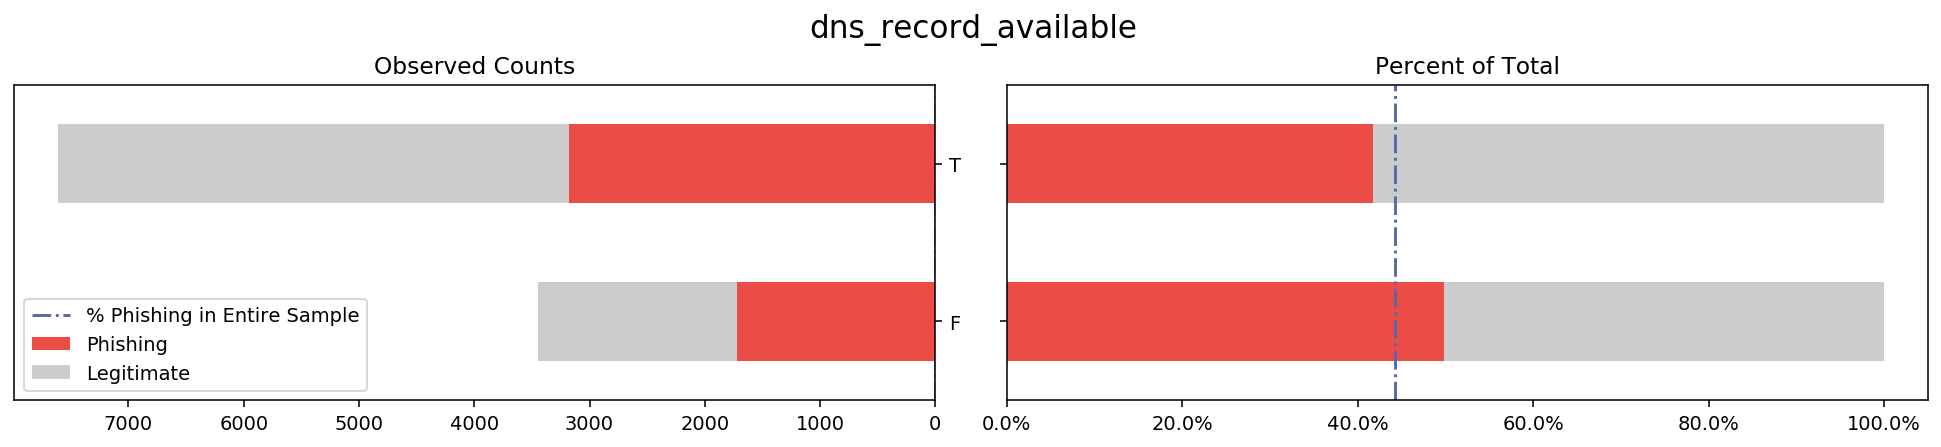

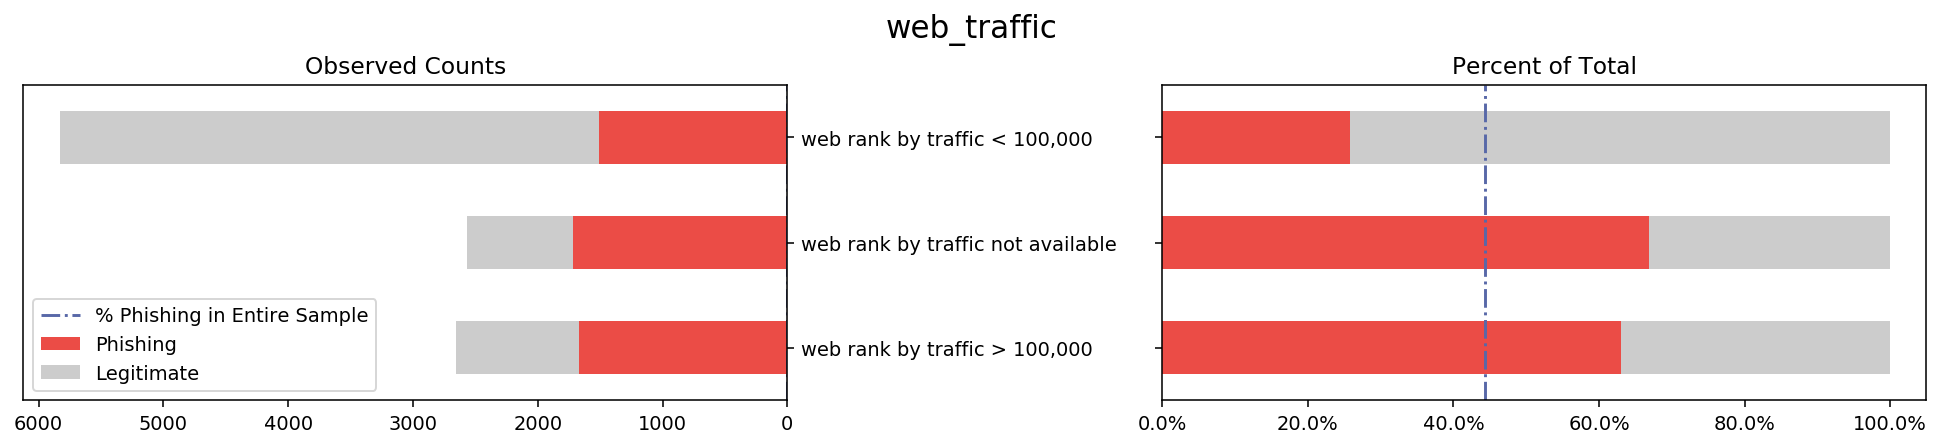

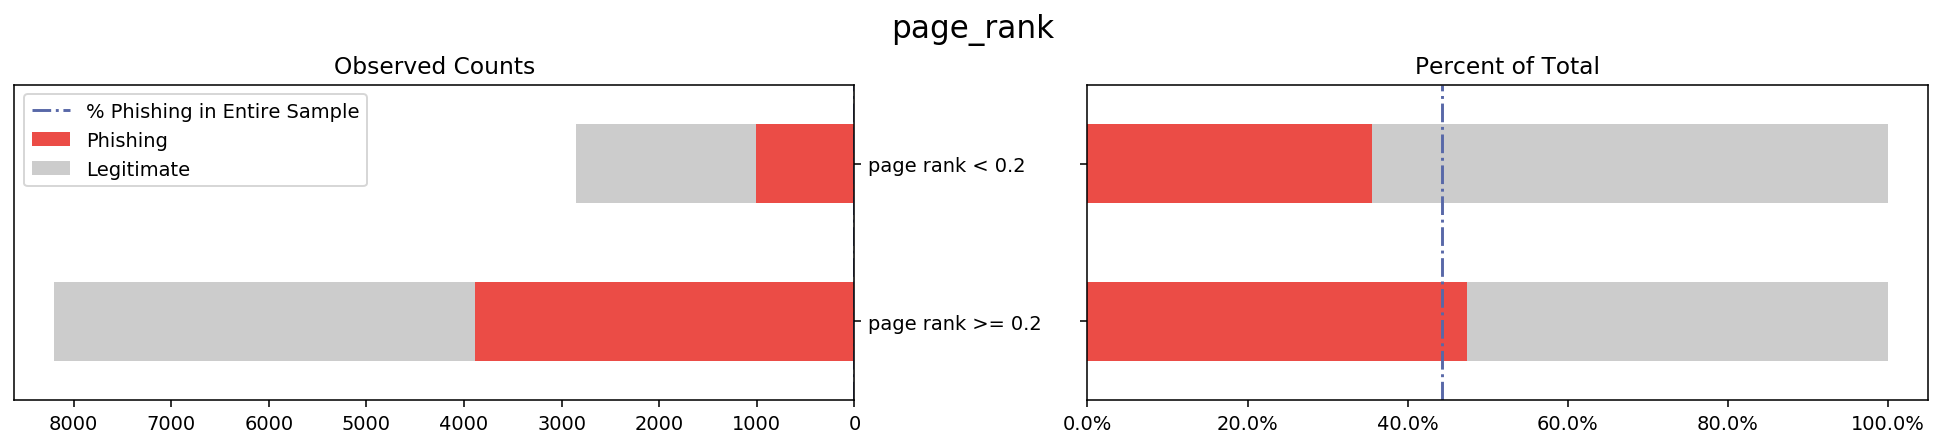

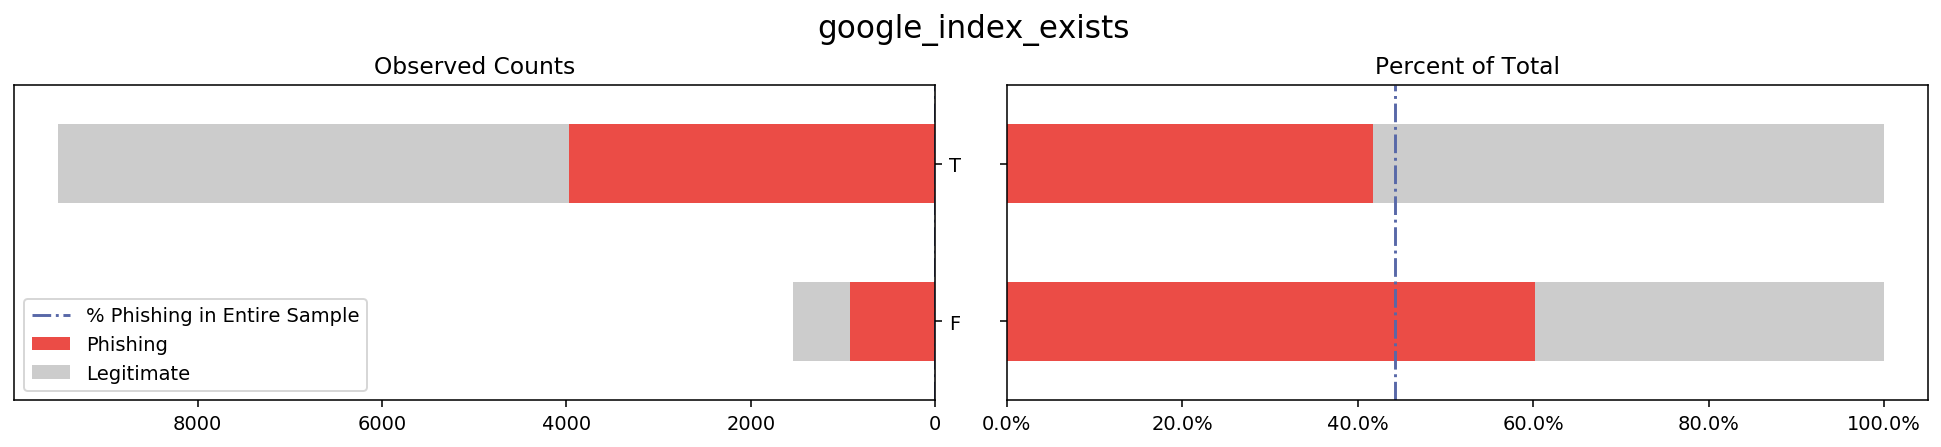

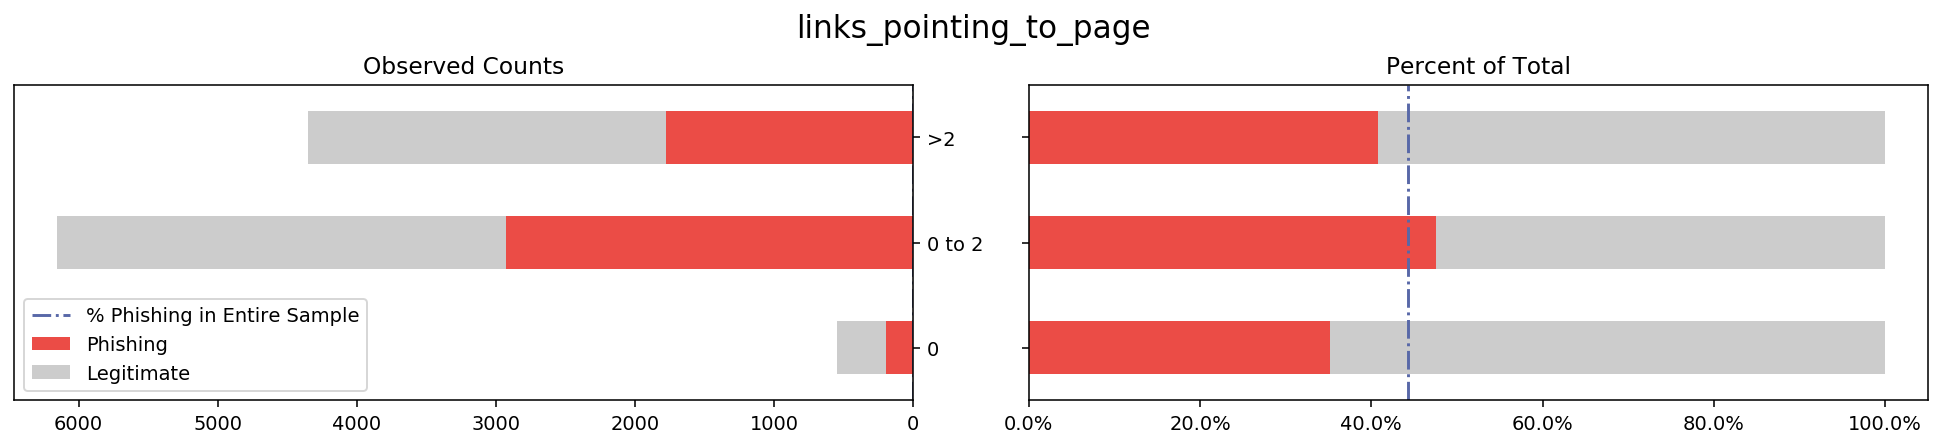

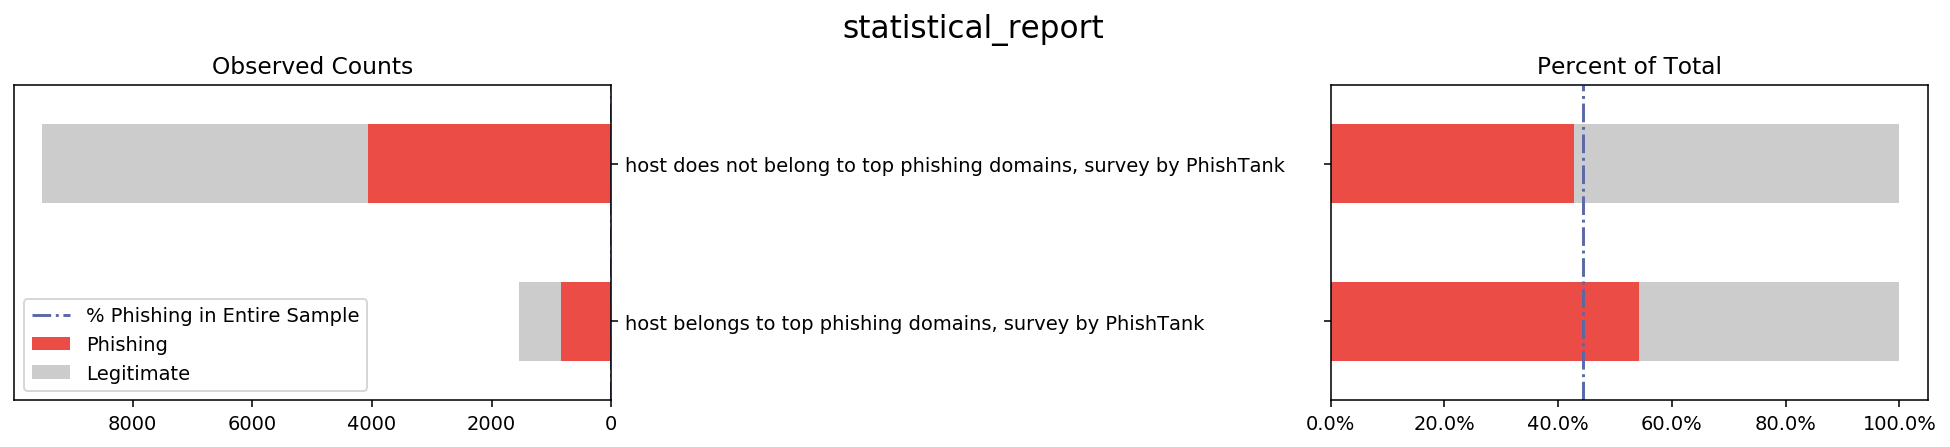

In [13]:
pal = ['#eb4c46', '#cccccc']
prop_phish = pd.DataFrame((data.groupby('result').size())/(data.groupby('result').size().sum())).loc[-1, 0]
for column in data.columns:
    if column == 'result':
        pass
    else:
        # Figure specs
        fig = plt.figure(figsize=(14, 3), dpi=140)
        fig.suptitle(column, fontsize=16, y=1.05)

        # Divide the figure into a 1x2 grid, and give me the first section

        ax1 = fig.add_subplot(121)

        # Divide the figure into a 1x2 grid, and give me the second section
        ax2 = fig.add_subplot(122)

        # Left groupby and plot
        g_count = data.groupby([column, 'result']).size().unstack('result')
        g_count.plot.barh(stacked = True, ax = ax1, color = pal).invert_xaxis()
        ax1.yaxis.tick_right()
        ax1.set_ylabel('')
        ax1.set_yticklabels(data_dict[column].values())
        ax1.axvline(0, color='#5868a8', linewidth=1.5, linestyle = '-.', label = 'Horizontal')
        ax1.legend(labels=['% Phishing in Entire Sample', 'Phishing', 'Legitimate'])
        #ax1.set_xlabel('Count')
        ax1.set_title('Observed Counts')


        # Right groupby and plot
        g_count2 = data.groupby([column, 'result']).size().unstack(column)
        p = g_count2.divide(g_count2.sum())
        plot2 = p.transpose().plot.barh(stacked = True, ax = ax2, color = pal)
        ax2.get_legend().remove()
        ax2.axvline(prop_phish, color='#5868a8', linewidth=1.5, linestyle = '-.')
        ticks = np.round(ax2.get_xticks()*100)
        ax2.set_xticklabels(['{:}%'.format(j) for j in [str(i) for i in ticks]])
        #ax2.set_xlabel('%')
        ax2.set_ylabel('')
        ax2.set_yticklabels('')
        ax2.set_title('Percent of Total')

        fig.tight_layout()

***

## 3. Statistical Data Analysis

#### 3a. Bootstrapping

This is done to see what features were significantly different from the sample proportion of phishing websites.

In [14]:
# Defining necessary functions to see which groups are interesting
def one_minus_mean(data):
    result = 1 - np.mean(data)
    return result


# courtesy of https://campus.datacamp.com/courses/statistical-thinking-in-python-part-2/bootstrap-confidence-intervals?ex=6
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

In [15]:
# changing this to be able to take mean of the bootstrap samples.
data.result[data.result == -1] = 0

In [16]:
# big checking function
# bootstrap replicates
# function automatically selects columns where the pop. prop. of phishing is outside the CI

high_interesting_columns = []
low_interesting_columns = []

for i in data.columns[:30]:    # excluding the result variable
    for j in set(data[i]):     # iterating over possible cateogies
        loop_data = data.result[data[i] == j]    # getting result variable for each category of each feature
        bs_replicates = draw_bs_reps(data=loop_data, func=one_minus_mean, size=10000)
        ci = np.percentile(bs_replicates, [.05, 99.95])
        if ((prop_phish < ci[0])): #interested in the high proportions
            high_interesting_columns.append(i)
        elif ((prop_phish > ci[1])): #low interesting columns
            low_interesting_columns.append(i)
            
    if high_interesting_columns != []:    # check for error when list is empty
        if sum(np.array(high_interesting_columns) == i) == 1:    # removing any columns where only 1 feature was out of CI
            high_interesting_columns.remove(i)
    if low_interesting_columns != []:    # check for error when list is empty
        if sum(np.array(low_interesting_columns) == i) == 1:    # removing any columns where only 1 feature was out of CI
            low_interesting_columns.remove(i)
            
high_interesting_columns = list(set(high_interesting_columns))    # removing duplicate entries
low_interesting_columns = list(set(low_interesting_columns))

print('Interesting columns with CI above sample proportion:', high_interesting_columns)
print('Interesting columns with CI below sample proportion:', low_interesting_columns)

Interesting columns with CI above sample proportion: ['ssl_final_state', 'web_traffic', 'url_contains_sub_domain']
Interesting columns with CI below sample proportion: ['links_pointing_to_page', 'url_of_anchor', 'sfh', 'links_in_tags']


In [16]:
high_interesting_columns = ['ssl_final_state', 'web_traffic', 'url_contains_sub_domain']
low_interesting_columns = ['links_pointing_to_page', 'url_of_anchor', 'sfh', 'links_in_tags']

##### 3b. Heatmap of 'interesting' columns

In [17]:
# Creating a hash table of every combination of interesting columns
# Each key in hash table contains heatmap table of combinations of interesting columns

# custom aggregation function
def prop(series):
    return round(sum(series)/len(series), 2)

#scalable solution
def heatmap_dict(heatmap_dict, interesting_columns):
    heatmap_dict = {}

    for i in range(len(interesting_columns)):
        for j in range(i+1, len(interesting_columns)):
            working_df = data[[interesting_columns[i], interesting_columns[j], 'result']].\
                         groupby([interesting_columns[i], interesting_columns[j]]).agg(prop).unstack(interesting_columns[j])

            working_df.columns = working_df.columns.droplevel() # remove 'result' from columns multindex

            heatmap_dict[interesting_columns[i], interesting_columns[j]] = working_df

    return heatmap_dict

In [18]:
low_heatmap_dict = {}
low_heatmap_dict = heatmap_dict(low_heatmap_dict, low_interesting_columns)
low_heatmap_dict

{('links_pointing_to_page',
  'url_of_anchor'): url_of_anchor             -1     0     1
 links_pointing_to_page                  
 -1                      0.08  0.77  0.95
  0                      0.00  0.68  0.94
  1                      0.02  0.77  0.94,
 ('links_pointing_to_page', 'sfh'): sfh                       -1     0     1
 links_pointing_to_page                  
 -1                      0.62  0.56  0.79
  0                      0.46  0.64  0.80
  1                      0.54  0.69  0.77,
 ('links_pointing_to_page',
  'links_in_tags'): links_in_tags             -1     0     1
 links_pointing_to_page                  
 -1                      0.48  0.77  0.66
  0                      0.32  0.58  0.76
  1                      0.49  0.64  0.67,
 ('url_of_anchor', 'sfh'): sfh              -1     0     1
 url_of_anchor                  
 -1             0.01  0.00  0.01
  0             0.65  0.87  0.91
  1             0.92  0.92  0.99,
 ('url_of_anchor', 'links_in_tags'): links_in_

In [19]:
high_heatmap_dict = {}
high_heatmap_dict = heatmap_dict(high_heatmap_dict, high_interesting_columns)
high_heatmap_dict

{('ssl_final_state', 'web_traffic'): web_traffic        -1     0     1
 ssl_final_state                  
 -1               0.05  0.11  0.24
  0               0.00  0.00  0.08
  1               0.93  0.64  0.95,
 ('ssl_final_state',
  'url_contains_sub_domain'): url_contains_sub_domain    -1     0     1
 ssl_final_state                          
 -1                       0.06  0.16  0.28
  0                       0.00  0.00  0.09
  1                       0.85  0.80  0.95,
 ('web_traffic',
  'url_contains_sub_domain'): url_contains_sub_domain    -1     0     1
 web_traffic                              
 -1                       0.24  0.11  0.75
  0                       0.18  0.16  0.64
  1                       0.66  0.64  0.89}

In [20]:
#Scalable solution, which is good

def prop_phish_heatmap(heatmap_dict, interesting_columns):
    for i in range(len(interesting_columns)-1):    #number of rows of entire heatmap

        fig, axes = plt.subplots(nrows=1, ncols=len(interesting_columns)-1, figsize=(4,2), dpi = 180)    # 9 columns with particular size
        plt.subplots_adjust(wspace=0, hspace=0)    # space between subplots
        cbar_ax = fig.add_axes([.91, .15, .01, .7])    # location of color bar

        for j, (k, ax) in zip(range(i+1, len(interesting_columns)), enumerate(axes)):

            im = sns.heatmap(heatmap_dict[interesting_columns[i], interesting_columns[j]], ax = axes[k+i], #puts blanks in beginning
                        square=True, annot = True, cmap='coolwarm', center=prop_phish, 
                        yticklabels = list(data_dict[interesting_columns[i]].values()),    #legible labels
                        xticklabels = list(data_dict[interesting_columns[j]].values()),
                        cbar=k == 0, cbar_ax=None if k else cbar_ax, vmin = 0, vmax = 0.75) #colorbar details
            ax.xaxis.set_label_position('top')
            
            if ax in axes[1:9]:
                axes[k+i].set_ylabel('')
                axes[k+i].set_yticklabels('')
                axes[k+i].tick_params(axis='y', length=0)   

                # only keeps the y label for the first plot in each row

        for l in range(0,i):
                axes[l].axis('off')
                # I got it to work.
                # removes all labels from blank plots

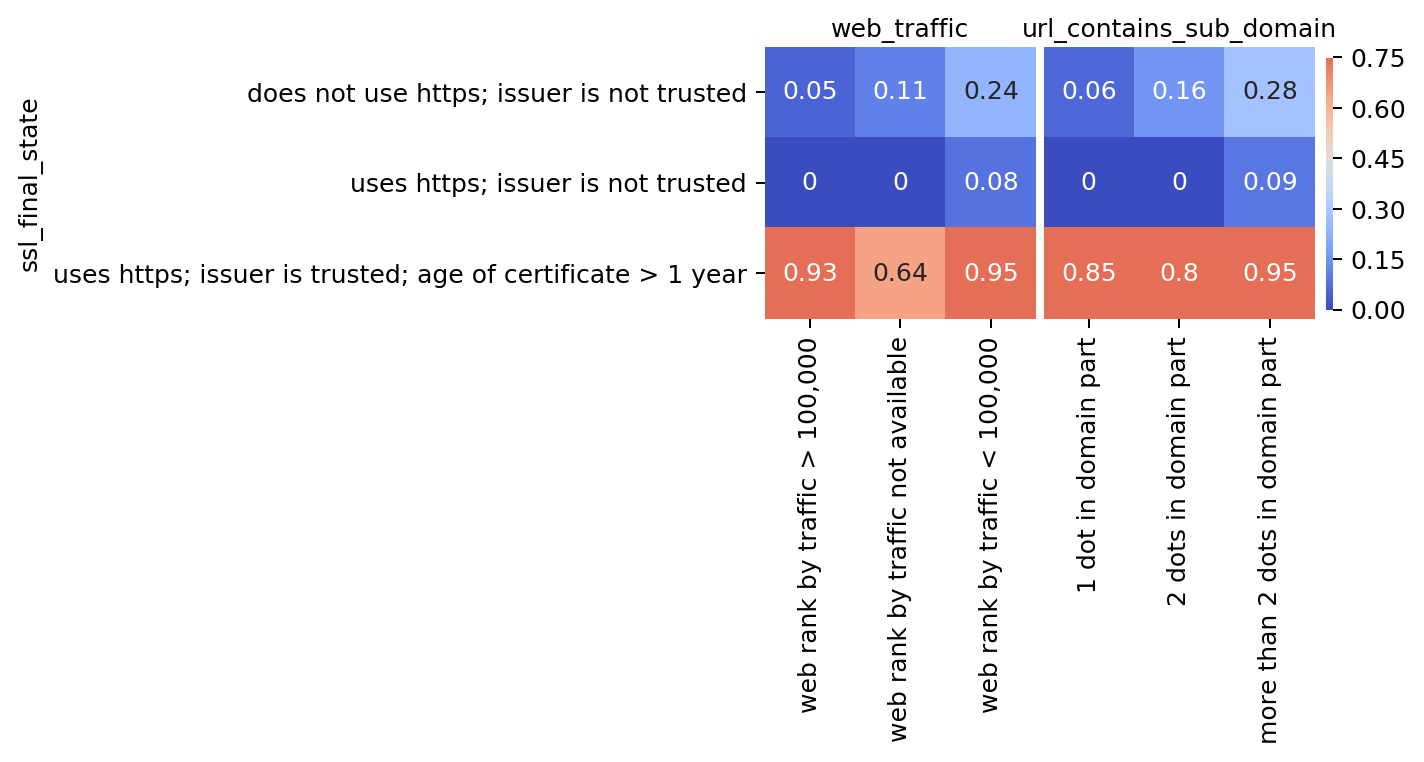

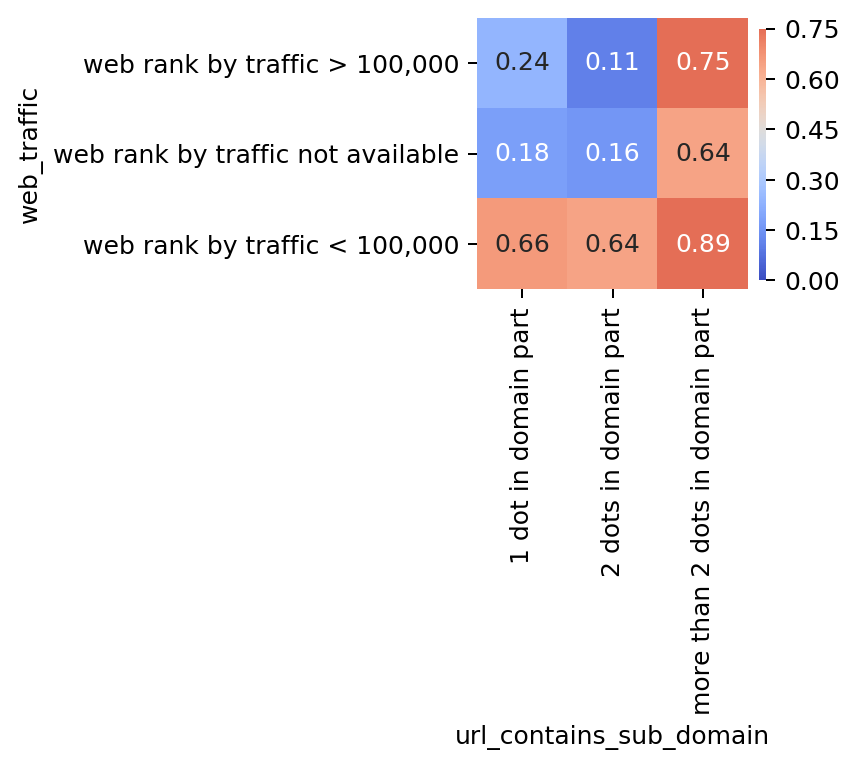

In [21]:
prop_phish_heatmap(high_heatmap_dict, high_interesting_columns)

In [22]:
low_heatmap_dict[('links_pointing_to_page', 'sfh')]

sfh,-1,0,1
links_pointing_to_page,,,
-1,0.62,0.56,0.79
0,0.46,0.64,0.80
1,0.54,0.69,0.77


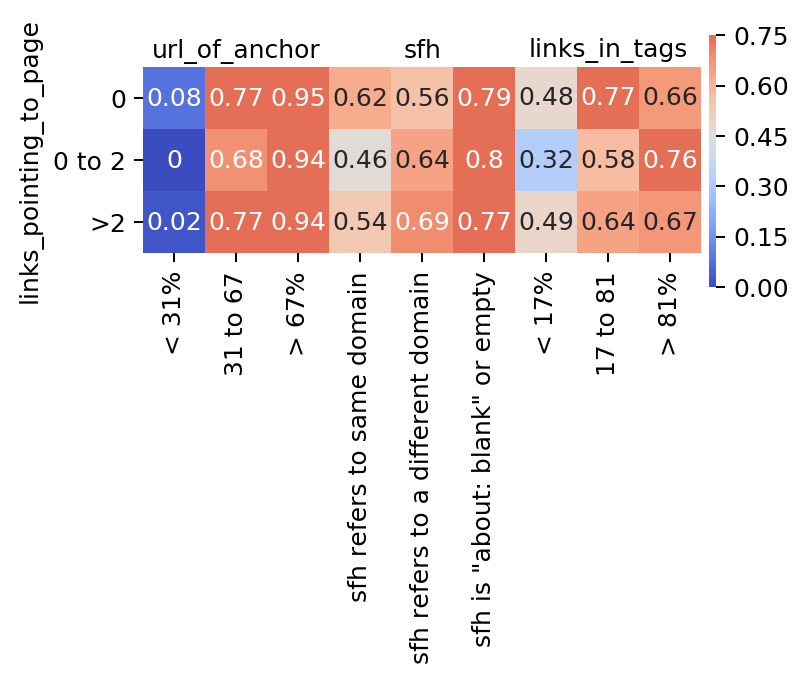

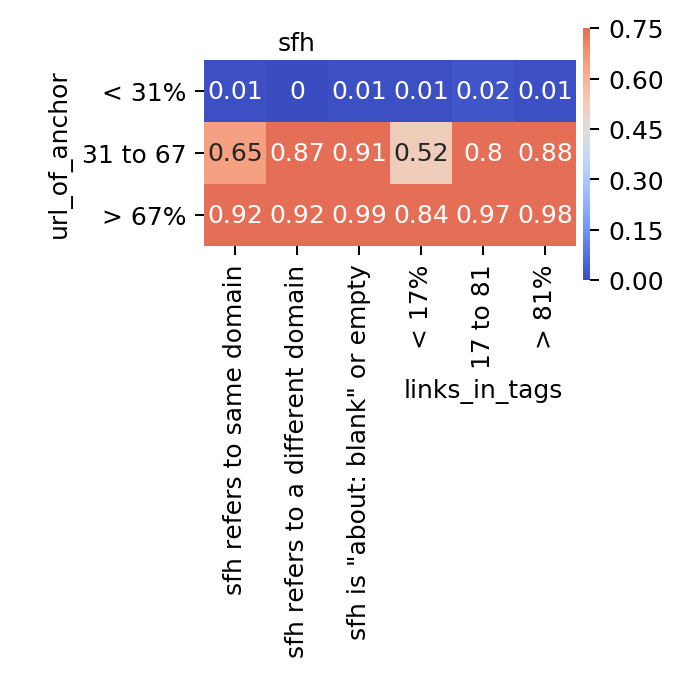

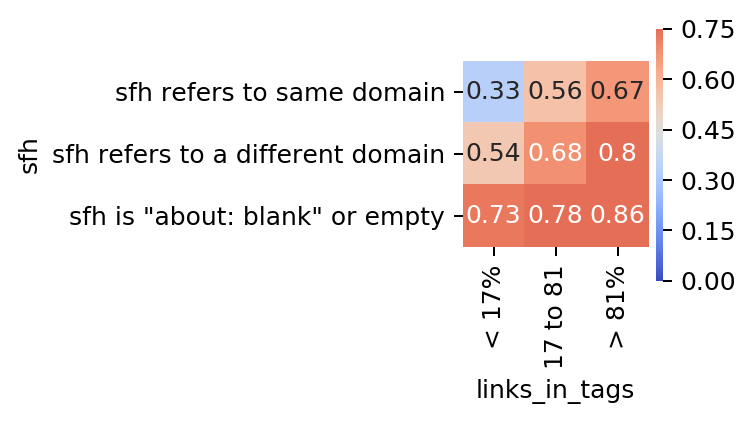

In [23]:
prop_phish_heatmap(low_heatmap_dict, low_interesting_columns)

***

## 4. Model Building

1. Scikitlearn cheatsheet is a good tool for this part.
2. Several models to consider:
 - regularized logistic regression, meaning lasso or ridge
 - KNN, but this is not always a good mehtod
 - XGBoost
 - Random Forest
 - Ultimately it will be an ensemble of these models.
3. SVM/Trees/linear regression can also be considered.

#### Initial train/test split

In [24]:
# help from datacamp

x = data.iloc[:,0:30]
y = data.iloc[:,30]

# Split into training and test set
# Stratifying to make sure the split of phisihng/valid stays equal across train/test split.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=2, stratify=y)

In [25]:
# Making sure stratifying worked.
np.mean(y_train), np.mean(y_test)

(0.5569914706642544, 0.5568284594513114)

### 4a. Logistic Regression
Not a bad starting point, using the default score, might need to change to roc_auc, same as rf, but it might stay there.

In [31]:
# help from datacamp
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)
# Setup the hyperparameter grid
c_space = np.logspace(-10, 10, 100)
param_grid = {'C': c_space}

# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the data
logreg_cv.fit(x_train, y_train)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 0.7924828983539186}
Best score is 0.9284052726802792


##### Making sure that I picked the proper C value.

In [32]:
# Making sure that we picked the proper C value.
warnings.filterwarnings(action='ignore', category = FutureWarning)
train_scores, valid_scores = validation_curve(logreg, x_train, y_train, "C", c_space, cv=5)

In [33]:
# Generalized function that returns a df with min, mean, max of the score for each C value

def min_mean_max_scores(scores):
    scores_df = pd.DataFrame([map(min, scores),
                                    map(np.mean, scores),
                                    map(max, scores)]).transpose()
    scores_df.columns = ['min', 'mean', 'max']

    scores_df.set_index([c_space], inplace = True)
    return scores_df

In [34]:
train_scores_df = min_mean_max_scores(train_scores)
valid_scores_df = min_mean_max_scores(valid_scores)

How does random Grid search compare?

In [35]:
# What values does randsearch pick?
# Let's plot those too
warnings.filterwarnings(action='ignore', category = FutureWarning)
rand_logreg_cv = RandomizedSearchCV(logreg, param_grid, cv=5)

rand_search_dict = defaultdict(int)
for i in range(10):
    # Fit it to the data
    rand_logreg_cv.fit(x_train, y_train)

    # Print the tuned parameters and score
    print("Tuned Logistic Regression Parameters: {}".format(rand_logreg_cv.best_params_)) 
    print("Best score is {}".format(rand_logreg_cv.best_score_))
    rand_search_dict[rand_logreg_cv.best_params_['C']] = rand_logreg_cv.best_score_


Tuned Logistic Regression Parameters: {'C': 2.009233002565046}
Best score is 0.9280175756009305
Tuned Logistic Regression Parameters: {'C': 0.49770235643321137}
Best score is 0.9278883432411476
Tuned Logistic Regression Parameters: {'C': 911162.7561154868}
Best score is 0.9276298785215819
Tuned Logistic Regression Parameters: {'C': 32.745491628777316}
Best score is 0.9276298785215819
Tuned Logistic Regression Parameters: {'C': 1.2618568830660184}
Best score is 0.9281468079607134
Tuned Logistic Regression Parameters: {'C': 151991108.2952927}
Best score is 0.9276298785215819
Tuned Logistic Regression Parameters: {'C': 0.04862601580065353}
Best score is 0.9278883432411476
Tuned Logistic Regression Parameters: {'C': 20.565123083486515}
Best score is 0.9276298785215819
Tuned Logistic Regression Parameters: {'C': 0.49770235643321137}
Best score is 0.9278883432411476
Tuned Logistic Regression Parameters: {'C': 0.49770235643321137}
Best score is 0.9278883432411476


In [36]:
rand_c_x = []
rand_c_y = []

for key, value in list(rand_search_dict.items()):    # converting to list for pickling later
    rand_c_x.append(key)
    rand_c_y.append(value)


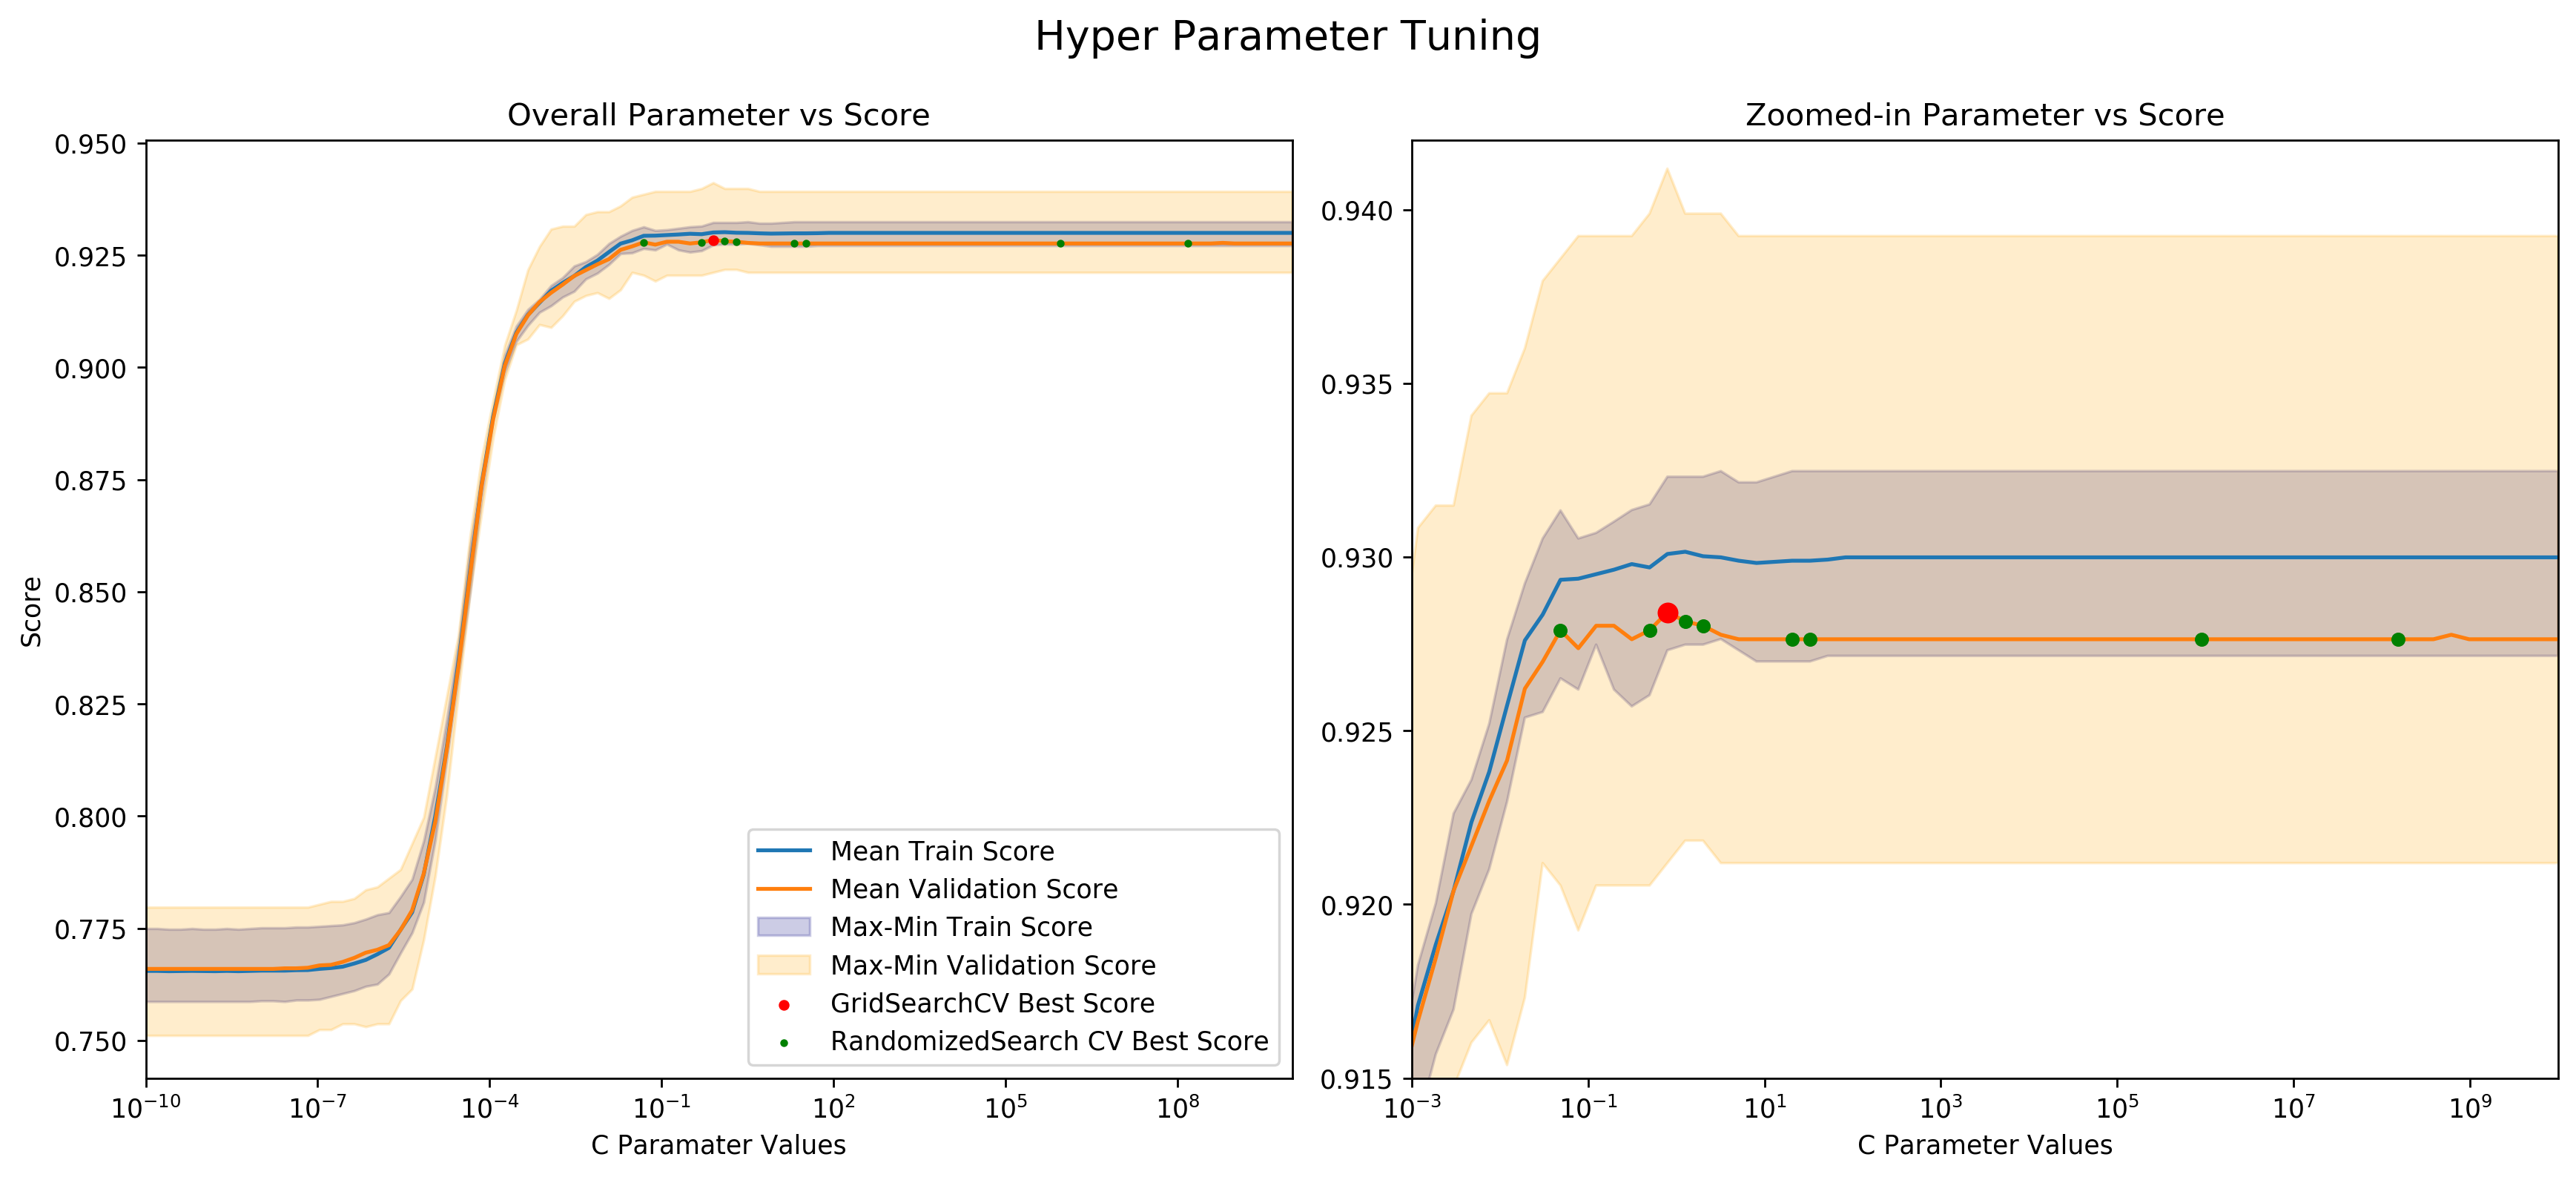

In [37]:
plt.figure(figsize=(14,6), dpi = 250)
plt.suptitle('Hyper Parameter Tuning', fontsize=16, y=1.05)


# First subplot
ax1 = plt.subplot(121)
train_scores_df['mean'].plot()
plt.xscale('log')
ax1.fill_between(train_scores_df.index, train_scores_df['min'],
                 train_scores_df['max'], alpha=0.2,
                 color="navy")

valid_scores_df['mean'].plot()
plt.xscale('log')
ax1.fill_between(valid_scores_df.index, valid_scores_df['min'],
                 valid_scores_df['max'], alpha=0.2,
                 color="orange")
plt.scatter(logreg_cv.best_params_['C'], logreg_cv.best_score_, c = 'red', s = 10, zorder=10) # putting it on top
plt.scatter(rand_c_x, rand_c_y, c = 'green', s = 4, zorder=10)
ax1.legend(labels=['Mean Train Score', 'Mean Validation Score', 'Max-Min Train Score', 'Max-Min Validation Score',
                   'GridSearchCV Best Score', 'RandomizedSearch CV Best Score'])
ax1.set_xlabel('C Paramater Values')
ax1.set_ylabel('Score')
ax1.set_title('Overall Parameter vs Score')


# Second subplot
ax2 = plt.subplot(122)
train_scores_df['mean'].plot()
ax2.fill_between(train_scores_df.index, train_scores_df['min'],
                 train_scores_df['max'], alpha=0.2,
                 color="navy")

valid_scores_df['mean'].plot()
plt.xscale('log')

ax2.fill_between(valid_scores_df.index, valid_scores_df['min'],
                 valid_scores_df['max'], alpha=0.2,
                 color="orange")
plt.ylim((0.915, 0.942))
plt.xlim((10e-4,10e9))
plt.scatter(logreg_cv.best_params_['C'], logreg_cv.best_score_, c = 'red', s = 50, zorder=10)
plt.scatter(rand_c_x, rand_c_y, c = 'green', s = 20, zorder=10)
ax2.set_xlabel('C Parameter Values')
ax2.set_title('Zoomed-in Parameter vs Score')


plt.tight_layout()
plt.show()

This function doesn't overfit, because the lines and spreads do not show any discernable bias.
The red dot represent a comprehensive grid search and shows that it's the optimal solution. The random grid search may be less computationally taxing, but it's not guaranteed to give you the optimal solution, only something close to it.
You have to take that risk because you can't spend the computing power in other scenarios.

##### Testing the model on the holdout set.

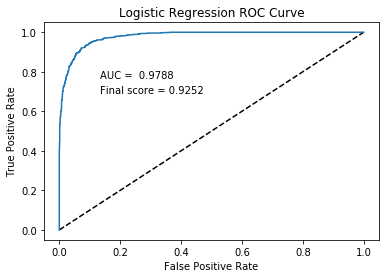

In [38]:
# courtesy of datacamp:
# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression(C = 0.7924828983539186)

# Fit it to the data
logreg.fit(x_train, y_train)

# Compute predicted probabilities: y_pred_prob
y_pred_prob_log = logreg.predict_proba(x_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr_log, tpr_log, thresholds_log = roc_curve(y_test, y_pred_prob_log)

# AUC calc
auc_log = roc_auc_score(y_test, y_pred_prob_log)
auc_log
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_log, tpr_log)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.annotate("AUC =  {}".format(round(auc_log, 4)), xy=(100, 200), xycoords='figure pixels')
plt.annotate("Final score = {}".format(round(logreg.score(x_test, y_test), 4)), xy=(100, 185), xycoords='figure pixels')
plt.show()

In [ ]:
# Precision Recall curve?

# maybe later but not now.

### 4b. Random forest

##### Grid Search

In [39]:
#datacamp
params_rf = {
             'n_estimators': [100, 350, 500],
             'max_features': ['log2', 'auto', 'sqrt'],
             'min_samples_leaf': [2, 10, 30], 
             }

In [40]:
#datacamp
# Instantiate rf
rf = RandomForestClassifier(random_state=2)

In [41]:
#datacamp

# Instantiate grid_rf
grid_rf = GridSearchCV(estimator=rf,
                       param_grid=params_rf,
                       scoring='roc_auc',
                       cv=3,
                       verbose=1,
                       n_jobs=-1)

grid_rf.fit(x_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:   27.0s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=2,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max

In [53]:
#datacamp

# Extract the best estimator
best_model = grid_rf.best_estimator_

# Predict test set labels
y_pred = best_model.predict(x_test)

# Compute roc_auc
roc_auc = roc_auc_score(y_test, y_pred)

# Print roc_auc
print('Test ROC_AUC of best model: {:.3f}'.format(roc_auc))

Test ROC_AUC of best model: 0.961


##### RF Random grid Search

In [54]:
# https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 5)]
# Number of features to consider at every split
max_features = ['log2', 'auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 200, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 5, 10, 20, 30]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [55]:
#datacamp

# Instantiate Randomized_rf
Randomized_rf = RandomizedSearchCV(estimator=rf,
                       param_distributions=params_rf,
                       scoring='roc_auc',
                       n_iter = 700,
                       cv=5,
                       verbose=1,
                       n_jobs=-1)

Randomized_rf.fit(x_train, y_train)

C:\Users\maksym\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 27 is smaller than n_iter=700. Running 27 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:   33.3s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

Run the above a bunch of times, collecting the roc_auc values and then use the one with the best? How to keep track of it? Hashtable.

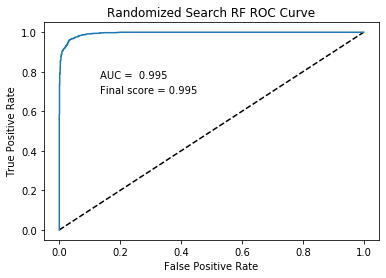

In [105]:
# courtesy of datacamp:

# Extract the best estimator
best_model_rand_rf = Randomized_rf.best_estimator_

# Predict test set labels
y_pred = best_model_rand_rf.predict(x_test)
# Compute predicted probabilities: y_pred_prob
y_pred_prob_rand_rf = Randomized_rf.predict_proba(x_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr_rand_rf, tpr_rand_rf, thresholds_rand_rf = roc_curve(y_test, y_pred_prob_rand_rf)

# AUC calc
auc_rf = roc_auc_score(y_test, y_pred_prob_rand_rf)
auc_rf

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rand_rf, tpr_rand_rf)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Randomized Search RF ROC Curve')
plt.annotate("AUC =  {}".format(round(auc_rf, 4)), xy=(100, 200), xycoords='figure pixels')
plt.annotate("Final score = {}".format(round(Randomized_rf.score(x_test, y_test), 4)), xy=(100, 185), xycoords='figure pixels')
plt.show()

### 4c. XGBoost

In [126]:
# fit model no training data, just to start
xgb1 = XGBClassifier(learning_rate =0.1,
                     n_estimators=1000,
                     max_depth=5,
                     min_child_weight=1,
                     gamma=0,
                     subsample=0.8,
                     colsample_bytree=0.8,
                     objective= 'binary:logistic',
                     nthread=4,
                     scale_pos_weight=1,
                     seed=27)


##### Tuning XGBoost

In [125]:
# https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/
# all tuning is based on the post above

param_test1 = {
 'max_depth':range(3,15,2),
 'min_child_weight':range(1,10,2)
}

gsearch1 = GridSearchCV(estimator = xgb1, 
                        param_grid = param_test1, 
                        scoring='roc_auc',
                        n_jobs=4,
                        iid=False, 
                        cv=5, 
                        verbose = 1)


gsearch1.fit(x_train, y_train)

gsearch1.best_params_, gsearch1.best_score_

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  1.5min
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:  7.4min finished


({'max_depth': 13, 'min_child_weight': 1}, 0.995847339281684)

In [131]:
param_test2 = {
 'max_depth': [13], # checked and then deleted
 'min_child_weight':[0,1,1.5]
}

gsearch2 = GridSearchCV(estimator = xgb1, 
                        param_grid = param_test2, 
                        scoring='roc_auc',
                        n_jobs=4,
                        iid=False, 
                        cv=5, 
                        verbose = 1)


gsearch2.fit(x_train, y_train)

gsearch2.best_params_, gsearch2.best_score_

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:   53.8s finished


({'max_depth': 13, 'min_child_weight': 0}, 0.9963918045026243)

In [132]:
#smaller min child weight? closer to zero than 0.5
param_test2b = {
 'min_child_weight':[i/10.0 for i in range(0,5)]
}

gsearch2b = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1,
                                                  n_estimators=500,
                                                  max_depth=13, #tuned
                                                  min_child_weight=1,
                                                  gamma=0,
                                                  subsample=0.8,
                                                  colsample_bytree=0.8,
                                                  objective= 'binary:logistic',
                                                  nthread=4,
                                                  scale_pos_weight=1,
                                                  seed=27), 
                        param_grid = param_test2b, 
                        scoring='roc_auc',
                        n_jobs=4,
                        iid=False, 
                        cv=5, 
                        verbose = 1)


gsearch2b.fit(x_train, y_train)

gsearch2b.best_params_, gsearch2b.best_score_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed:  1.6min finished


({'min_child_weight': 0.0}, 0.9963918045026243)

In [133]:
#
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}

gsearch3 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1,
                                                  n_estimators=250,
                                                  max_depth=13, #tuned
                                                  min_child_weight=0, #tuned
                                                  gamma=0,
                                                  subsample=0.8,
                                                  colsample_bytree=0.8,
                                                  objective= 'binary:logistic',
                                                  nthread=4,
                                                  scale_pos_weight=1,
                                                  seed=27), 
                        param_grid = param_test3, 
                        scoring='roc_auc',
                        n_jobs=4,
                        iid=False, 
                        cv=5, 
                        verbose = 1)


gsearch3.fit(x_train, y_train)

gsearch3.best_params_, gsearch3.best_score_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed:  1.1min finished


({'gamma': 0.0}, 0.9963151538471529)

In [135]:
param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}

gsearch4 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1,
                                                  n_estimators=250,
                                                  max_depth=13, #tuned
                                                  min_child_weight=0, #tuned
                                                  gamma=0, #tuned
                                                  subsample=0.8,
                                                  colsample_bytree=0.8,
                                                  objective= 'binary:logistic',
                                                  nthread=4,
                                                  scale_pos_weight=1,
                                                  seed=27), 
                        param_grid = param_test4, 
                        scoring='roc_auc',
                        n_jobs=4,
                        iid=False, 
                        cv=5, 
                        verbose = 1)


gsearch4.fit(x_train, y_train)

gsearch4.best_params_, gsearch4.best_score_

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  1.7min
[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed:  3.3min finished


({'colsample_bytree': 0.8, 'subsample': 0.9}, 0.9964501829125497)

In [136]:
param_test4b = {
 'subsample':[0.75, 0.775, 0.8, 0.825, 0.85],
 'colsample_bytree':[0.85, 0.875, 0.9, 0.925, 0.95]
}

gsearch4b = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1,
                                                  n_estimators=250,
                                                  max_depth=13, #tuned
                                                  min_child_weight=0, #tuned
                                                  gamma=0, #tuned
                                                  subsample=0.8,
                                                  colsample_bytree=0.8,
                                                  objective= 'binary:logistic',
                                                  nthread=4,
                                                  scale_pos_weight=1,
                                                  seed=27), 
                        param_grid = param_test4b, 
                        scoring='roc_auc',
                        n_jobs=4,
                        iid=False, 
                        cv=5, 
                        verbose = 1)


gsearch4b.fit(x_train, y_train)

gsearch4b.best_params_, gsearch4b.best_score_

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  2.0min
[Parallel(n_jobs=4)]: Done 125 out of 125 | elapsed:  5.7min finished


({'colsample_bytree': 0.9, 'subsample': 0.775}, 0.9963463371892164)

In [138]:
param_test5 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100],
 'reg_lambda':[1e-5, 1e-2, 0.1, 1, 100]
}

gsearch5 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1,
                                                  n_estimators=250,
                                                  max_depth=13, #tuned
                                                  min_child_weight=0, #tuned
                                                  gamma=0, #tuned
                                                  subsample=0.775, #tuned
                                                  colsample_bytree=0.9, #tuned
                                                  objective= 'binary:logistic',
                                                  nthread=4,
                                                  scale_pos_weight=1,
                                                  seed=27), 
                        param_grid = param_test5, 
                        scoring='roc_auc',
                        n_jobs=4,
                        iid=False, 
                        cv=5, 
                        verbose = 1)


gsearch5.fit(x_train, y_train)

gsearch5.best_params_, gsearch5.best_score_

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  2.1min
[Parallel(n_jobs=4)]: Done 125 out of 125 | elapsed:  4.1min finished


({'reg_alpha': 1e-05, 'reg_lambda': 1}, 0.9963388854981907)

In [149]:
param_test5b = {
 'reg_alpha':[1e-6, 1e-5, 1e-4],
 'reg_lambda':[0.1, 1, 2, 5, 10]
}

gsearch5b = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1,
                                                  n_estimators=250,
                                                  max_depth=13, #tuned
                                                  min_child_weight=0, #tuned
                                                  gamma=0, #tuned
                                                  subsample=0.775, #tuned
                                                  colsample_bytree=0.9, #tuned
                                                  objective= 'binary:logistic',
                                                  nthread=4,
                                                  scale_pos_weight=1,
                                                  seed=27), 
                        param_grid = param_test5b, 
                        scoring='roc_auc',
                        n_jobs=4,
                        iid=False, 
                        cv=5, 
                        verbose = 1)


gsearch5b.fit(x_train, y_train)

gsearch5b.best_params_, gsearch5b.best_score_

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  2.0min
[Parallel(n_jobs=4)]: Done  75 out of  75 | elapsed:  3.5min finished


({'reg_alpha': 1e-05, 'reg_lambda': 1}, 0.9963388854981907)

In [153]:
param_test6 = {
 'learning_rate':[i/10 for i in range(0,5)]
}

gsearch6 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1,
                                                  n_estimators=250,
                                                  max_depth=13, #tuned
                                                  min_child_weight=0, #tuned
                                                  gamma=0, #tuned
                                                  subsample=0.775, #tuned
                                                  colsample_bytree=0.9, #tuned
                                                  objective= 'binary:logistic',
                                                  nthread=4,
                                                  scale_pos_weight=1,
                                                  reg_alpha = 1e-05, #tuned
                                                  reg_lambda = 1, #tuned
                                                  seed=27), 
                        param_grid = param_test6, 
                        scoring='roc_auc',
                        n_jobs=4,
                        iid=False, 
                        cv=5, 
                        verbose = 1)


gsearch6.fit(x_train, y_train)

gsearch6.best_params_, gsearch6.best_score_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed:  1.1min finished


({'learning_rate': 0.1}, 0.9963388854981907)

In [156]:
param_test7 = {
 'learning_rate':[i/100 for i in range(8,12)]
}

gsearch7 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1,
                                                  n_estimators=250,
                                                  max_depth=13, #tuned
                                                  min_child_weight=0, #tuned
                                                  gamma=0, #tuned
                                                  subsample=0.775, #tuned
                                                  colsample_bytree=0.9, #tuned
                                                  objective= 'binary:logistic',
                                                  nthread=4,
                                                  scale_pos_weight=1,
                                                  reg_alpha = 1e-05, #tuned
                                                  reg_lambda = 1, #tuned
                                                  seed=27), 
                        param_grid = param_test7, 
                        scoring='roc_auc',
                        n_jobs=4,
                        iid=False, 
                        cv=5, 
                        verbose = 1)


gsearch7.fit(x_train, y_train)

gsearch7.best_params_, gsearch7.best_score_

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:   57.4s finished


({'learning_rate': 0.11}, 0.9963737522231758)

#### Tuned vs Not-Tuned XGBoost Performance on Test Data

In [70]:
#original classifier
untuned_xgb = XGBClassifier(learning_rate =0.1,
                     n_estimators=2000,
                     max_depth=5,
                     min_child_weight=1,
                     gamma=0,
                     subsample=0.8,
                     colsample_bytree=0.8,
                     objective= 'binary:logistic',
                     nthread=4,
                     scale_pos_weight=1,
                     seed=27).fit(x_train, y_train)
y_pred_prob_untuned_xgb = untuned_xgb.predict_proba(x_test)[:,1]
y_pred_untuned_xgb = untuned_xgb.predict(x_test)
roc_auc_untuned_xgb = roc_auc_score(y_test, y_pred_prob_untuned_xgb)
roc_auc_untuned_xgb

0.996457575991956

In [71]:
#test This is the tuned one.
tuned_xgb = XGBClassifier(learning_rate =0.11, #tuned
                                                  n_estimators=2000,
                                                  max_depth=13, #tuned
                                                  min_child_weight=0, #tuned
                                                  gamma=0, #tuned
                                                  subsample=0.775, #tuned
                                                  colsample_bytree=0.9, #tuned
                                                  objective= 'binary:logistic',
                                                  nthread=4,
                                                  scale_pos_weight=1,
                                                  reg_alpha = 1e-05, #tuned
                                                  reg_lambda = 1, #tuned
                                                  seed=27).fit(x_train, y_train)
y_pred_prob_tuned_xgb = tuned_xgb.predict_proba(x_test)[:,1]
y_pred_tuned_xgb = tuned_xgb.predict(x_test)
roc_auc_tuned_xgb = roc_auc_score(y_test, y_pred_prob_tuned_xgb)
roc_auc_tuned_xgb

0.9969015760066885

### Comparison of all models so far.

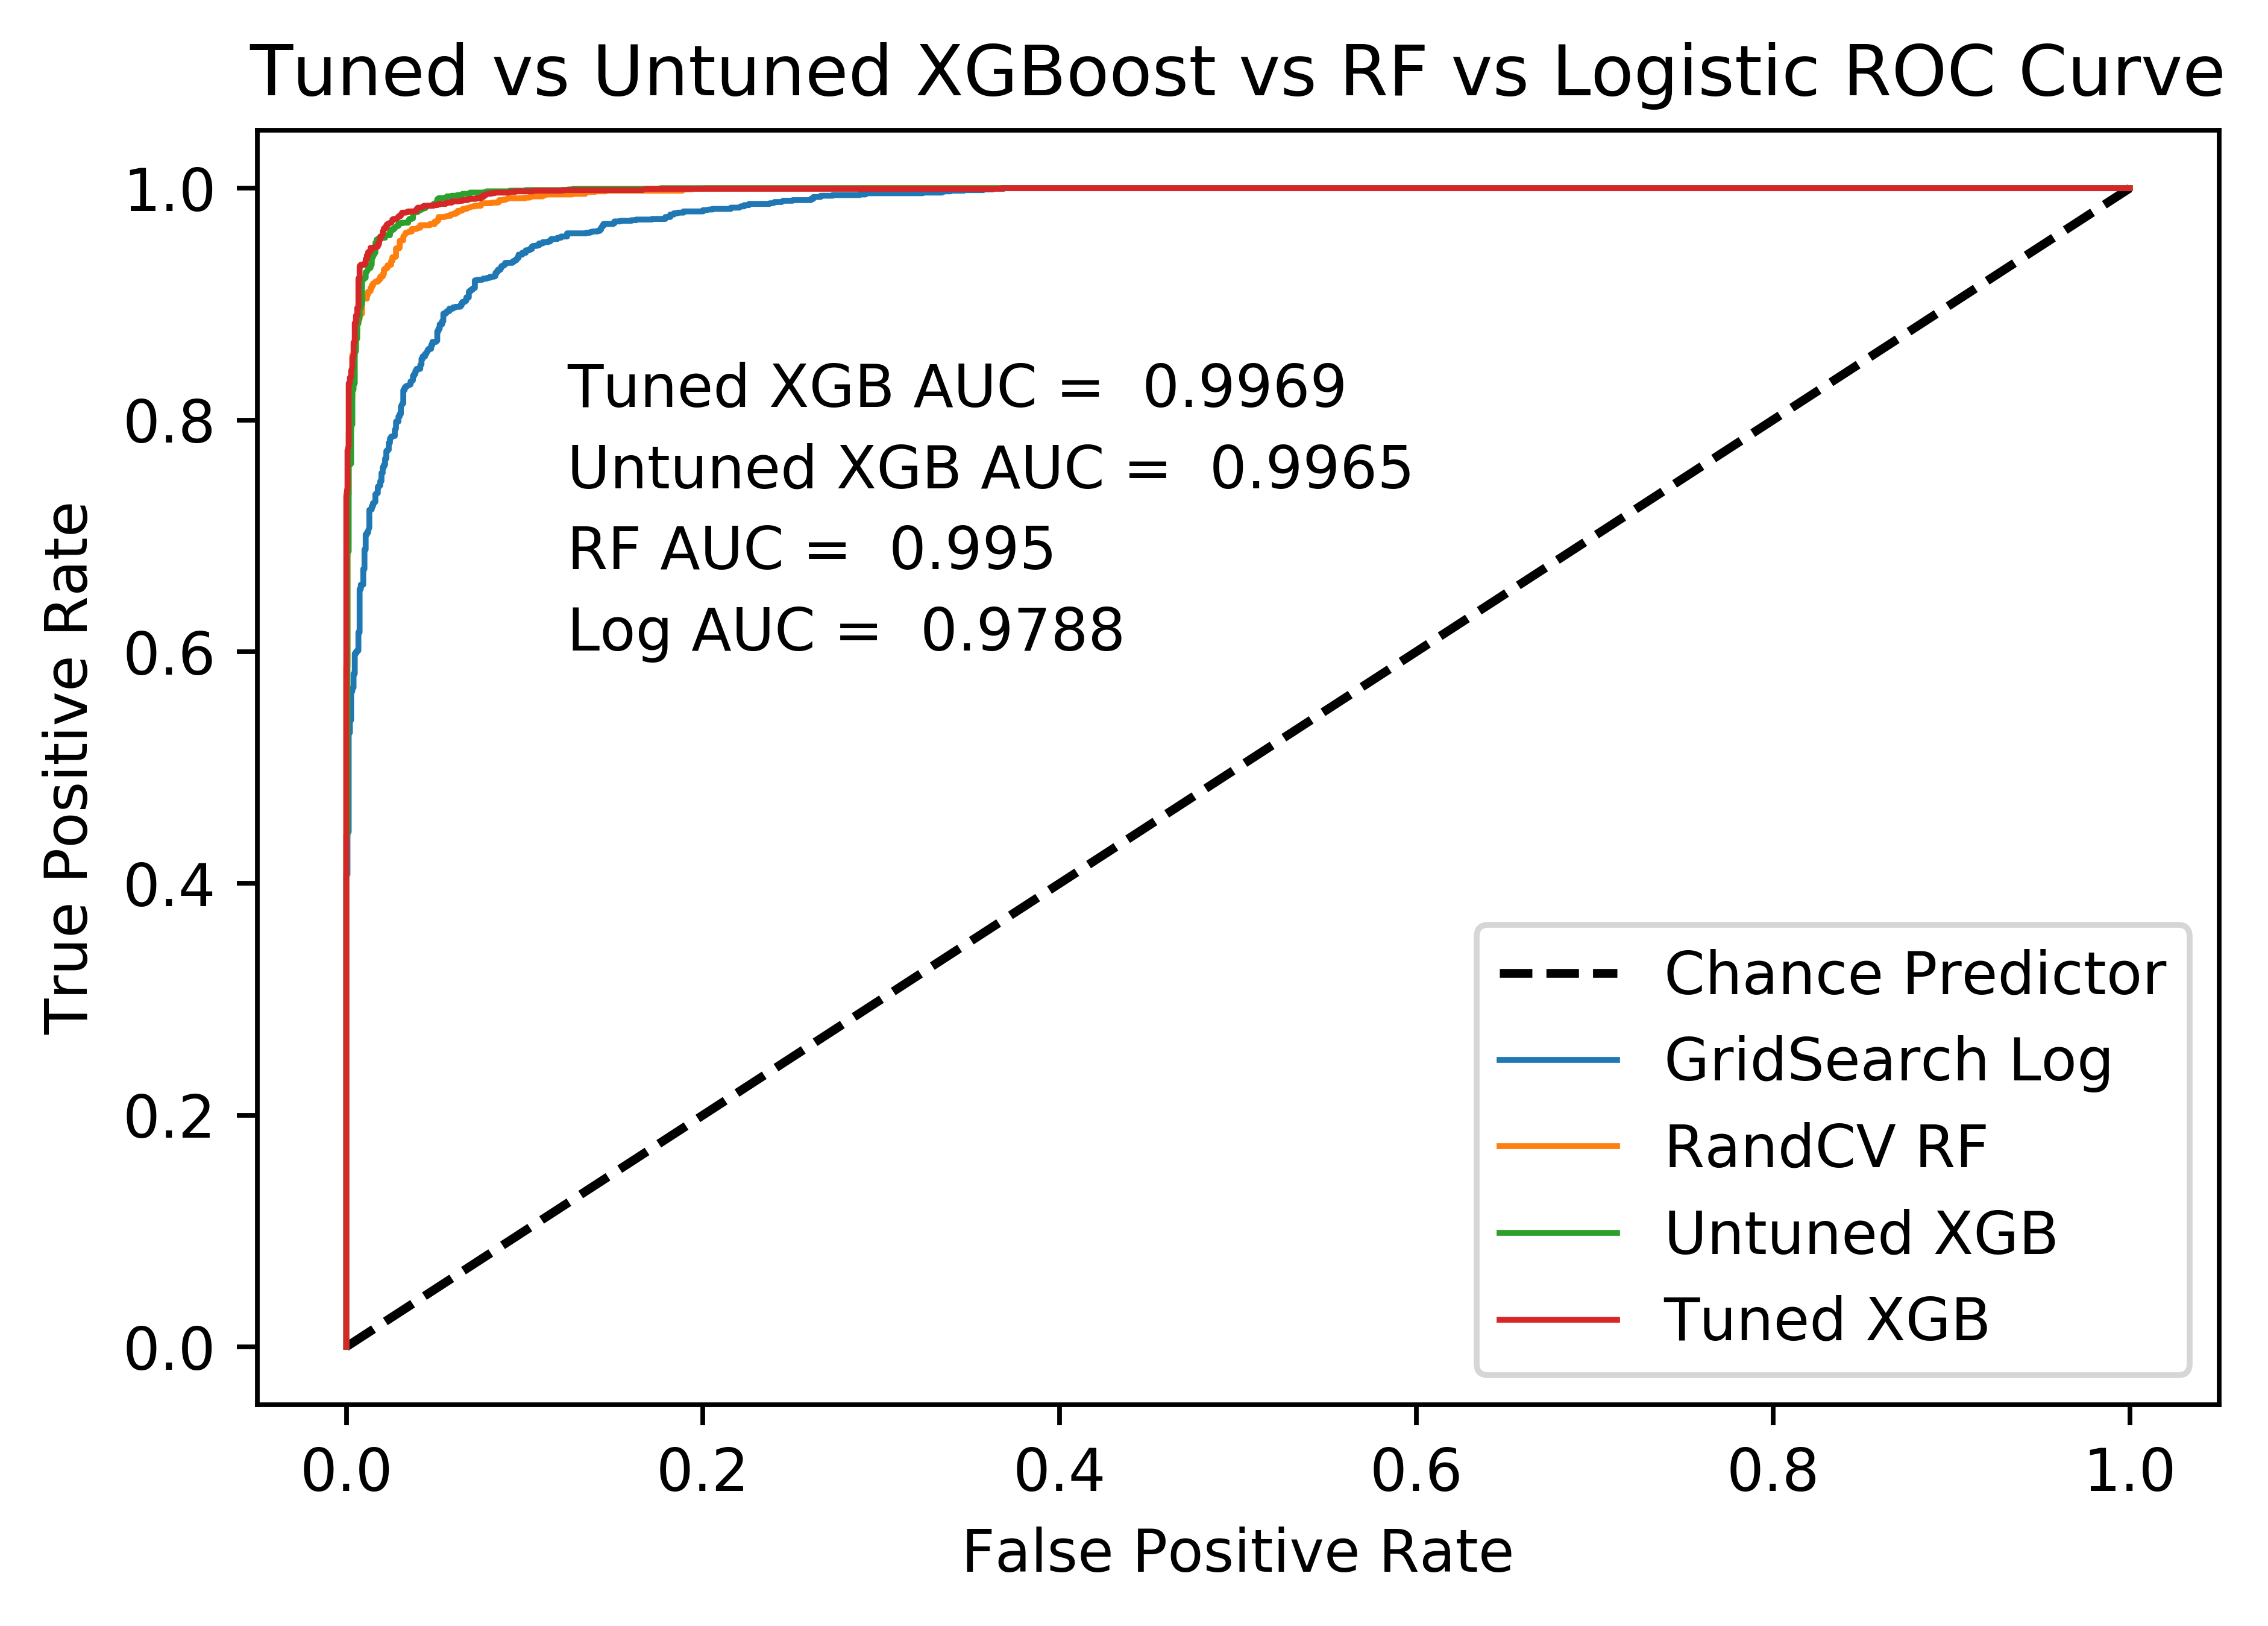

In [102]:
# courtesy of datacamp:

# Generate ROC curve values: fpr, tpr, thresholds
fpr_untuned_xgb, tpr_untuned_xgb, thresholds_untuned_xgb = roc_curve(y_test, y_pred_prob_untuned_xgb)
fpr_tuned_xgb, tpr_tuned_xgb, thresholds_tuned_xgb = roc_curve(y_test, y_pred_prob_tuned_xgb)



# Plot ROC curve
plt.figure( dpi = 700)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_log, tpr_log, linewidth = 1)
plt.plot(fpr_rand_rf, tpr_rand_rf, linewidth = 1)
plt.plot(fpr_untuned_xgb, tpr_untuned_xgb, linewidth = 1) 
plt.plot(fpr_tuned_xgb, tpr_tuned_xgb, linewidth = 1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Tuned vs Untuned XGBoost vs RF vs Logistic ROC Curve')
plt.legend(labels=['Chance Predictor', 'GridSearch Log', 'RandCV RF','Untuned XGB', 'Tuned XGB'])
plt.annotate("Tuned XGB AUC =  {}".format(round(roc_auc_tuned_xgb, 4)), xy=(0.25, 0.75), xycoords='figure fraction')
plt.annotate("Untuned XGB AUC =  {}".format(round(roc_auc_untuned_xgb, 4)), xy=(0.25, 0.7), xycoords='figure fraction')
plt.annotate("RF AUC =  {}".format(round(auc_rf, 4)), xy=(0.25, 0.65), xycoords='figure fraction')
plt.annotate("Log AUC =  {}".format(round(auc_log, 4)), xy=(0.25, 0.6), xycoords='figure fraction')
plt.show()

The ROC curve shows that all of these are actually pretty good. But the tuned XGBoost algorithm is the best of all.
Perhaps I can get an even higher AUC with model ensembling.

### Model Ensembling

In [ ]:
#can't get this to work just yet.

In [130]:
from mlens.ensemble import SuperLearner

# --- Build ---
# Passing a scoring function will create cv scores during fitting
# the scorer should be a simple function accepting to vectors and returning a scalar
ensemble = SuperLearner(scorer=roc_auc_score, random_state=2, verbose=2)

# Build the first layer
ensemble.add([tuned_xgb, untuned_xgb])

# Attach the final meta estimator
#ensemble.add_meta(best_model_rand_rf)

# --- Use ---

# Fit ensemble
ensemble.fit(x_train, y_train)

# Predict
ensemble_preds = ensemble.predict(x_test)
ensemble_prob_preds = ensemble.predict_proba(x_test)[:,1]


Fitting 1 layers
Processing layer-1             done | 00:00:48
Fit complete                        | 00:00:48

Predicting 1 layers
Processing layer-1             done | 00:00:00
Predict complete                    | 00:00:00

Predicting 1 layers
Processing layer-1             done | 00:00:00
Predict complete                    | 00:00:00


In [131]:
roc_auc_score(ensemble_prob_preds, y_test)

0.9689083722993356

dill doesn't seem to work.
I will try to use pickle instead.

In [33]:
#import dill
#dill.load_session('phishing_env.db')

In [34]:
# Saving all variables
#import dill
#dill.dump_session('phishing_env.db')

### Scratch work